# Import Libraries

In [1]:
# libraries for analysis
import pandas as pd 
import numpy as np
import statistics 
from scipy import stats
from sklearn import preprocessing
# libraries for visuals
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure as fig
# miscellaneous 
from datetime import datetime, timedelta, date
from tabulate import tabulate # pip install tabulate

# Define Functions

In [2]:
def plotCaseTertinggi(df, judul, date, n):
    """
    Fungsi untuk menampilkan plotting data
    kasus tertinggi ke-n ke grafik 
    pada update tanggal terakhir.
    """
    # Banyak data tertinggi yang ingin ditampilkan  
    n_tertinggi = n
    # first date of the dataframe
    first_date = (list(df)[1:])[0]
    # ukuran grafik
    plt.figure(figsize=[15,5])   
    # array n negara yang paling tinggi sampai update terakhir
    r, c = df.shape
    case_n = [] 
    index_biggest_element = [] 
    for i in np.arange(0, r):
        # semua negara dan tanggal terakhir
        case_n.append(df.loc[df.iloc[i, 0], date])
    for i in np.arange(1, n_tertinggi+1):
        # index n negara tertinggi
        index_biggest_element.append(case_n.index(sorted(case_n, reverse=False)[-i]))
    index_biggest_element = np.array(index_biggest_element)
    # plot negara lain
    for i in index_biggest_element:
        df.loc[df.iloc[i, 0], first_date:date].plot(label=df.iloc[i, 0])
    # plot  
    plt.grid()
    plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
    plt.xlabel('Dates')
    plt.ylabel('Cases')
    plt.title('%s Negara Tertinggi pada %s sampai %s' % (n_tertinggi, judul, date))
    plt.show()
    
def plotCaseTertinggiIndonesia(df, judul, date, n):
    """
    Fungsi untuk menampilkan plotting data
    kasus tertinggi ke-n ke grafik 
    pada update tanggal terakhir.
    """
    # Banyak data tertinggi yang ingin ditampilkan  
    n_tertinggi = n
    # first date of the dataframe
    first_date = (list(df)[0:])[0]
    # ukuran grafik
    plt.figure(figsize=[15,5])   
    # array n negara yang paling tinggi sampai update terakhir
    r, c = df.shape
    case_n = [] 
    index_biggest_element = [] 
    for i in np.arange(0, r):
        # semua negara dan tanggal terakhir
        case_n.append(df.loc[df.index.tolist()[i], date])
    for i in np.arange(1, n_tertinggi+1):
        # index n negara tertinggi
        index_biggest_element.append(case_n.index(sorted(case_n, reverse=False)[-i]))
    index_biggest_element = np.array(index_biggest_element)
    # plot negara lain
    for i in index_biggest_element:
        df.loc[df.index.tolist()[i], first_date:date].plot(label=df.index.tolist()[i])
    # plot  
    plt.grid()
    plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
    plt.xlabel('Dates')
    plt.ylabel('Cases')
    plt.title('%s Provinsi Tertinggi pada %s sampai %s' % (n_tertinggi, judul, date))
    plt.show()

# Import Dataset

In [3]:
""" Data International (John Hopkins) """
# url
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
# define the datas
df_confirmed = pd.read_csv(url_confirmed)
df_death = pd.read_csv(url_death)
df_recovered = pd.read_csv(url_recovered)
# define df with the datas
df = [df_confirmed, df_death, df_recovered]
judul_df = ['Confirmed Cases', 'Death Cases', 'Recovered Cases']

""" Data KawalCovid19 """
# Import Data 
googleSheetId = '1ma1T9hWbec1pXlwZ89WakRk-OfVUQZsOCFl4FwZxzVw'
# Data Timeline
worksheetName = 'Timeline'
url_kawalcovid19_timeline = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, worksheetName)
df_indo_timeline = pd.read_csv(url_kawalcovid19_timeline, index_col=0)
# Data Statistik Harian
worksheetName_statistik_harian = 'Statistik+Harian'
url_kawalcovid19_statistik_harian = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, worksheetName_statistik_harian)
df_indo_statistik_harian = pd.read_csv(url_kawalcovid19_statistik_harian, index_col=0)

In [4]:
# transpose
df_indo_timeline = df_indo_timeline.rename_axis(None).T
# gorontalo sebagai provinsi terakhir
df_indo_timeline = df_indo_timeline.loc[:'Gorontalo',:]
# tanggal pertama
first_confirmed = datetime(2020,3,18) 
first_daily_case = datetime(2020,3,15)
first_recovered = datetime(2020,3,21)
first_daily_recovered = datetime(2020,3,21)
first_death = datetime(2020,3,18)
first_daily_death = datetime(2020,3,21)
# get latest date
today = datetime.now() 
this_month = today.strftime("%b")
this_year = today.strftime("%Y")
date_this_month = []
for i in list(df_indo_timeline):
    if this_month in i:
        dt = datetime.strptime(i, '%d-%b')
        date_this_month.append(dt.day)
latest_date = max(date_this_month)
yesterday_indonesia = '%s-%s' % (latest_date, this_month)
# delta date
delta_days_confirmed = (datetime(int(this_year), int(today.strftime("%m")), latest_date)-first_confirmed).days
delta_days_daily_confirmed = (datetime(int(this_year), int(today.strftime("%m")), latest_date)-first_daily_case).days
delta_days_recovered = (datetime(int(this_year), int(today.strftime("%m")), latest_date)-first_recovered).days
delta_days_daily_recovered = (datetime(int(this_year), int(today.strftime("%m")), latest_date)-first_daily_recovered).days
delta_days_death = (datetime(int(this_year), int(today.strftime("%m")), latest_date)-first_death).days
delta_days_daily_death = (datetime(int(this_year), int(today.strftime("%m")), latest_date)-first_daily_death).days
# dataframes
df_indo_confirmed = df_indo_timeline.iloc[:,0:delta_days_confirmed+1]
df_indo_daily_confirmed = df_indo_timeline.iloc[:,delta_days_confirmed+1:(delta_days_confirmed+delta_days_daily_confirmed+2)]
df_indo_recovered = df_indo_timeline.iloc[:,(delta_days_confirmed+delta_days_daily_confirmed+2):(delta_days_confirmed+delta_days_daily_confirmed+delta_days_recovered+3)]
df_indo_daily_recovered = df_indo_timeline.iloc[:,(delta_days_confirmed+delta_days_daily_confirmed+delta_days_recovered+3):(delta_days_confirmed+delta_days_daily_confirmed+delta_days_recovered+delta_days_daily_recovered+4)]
df_indo_death = df_indo_timeline.iloc[:,(delta_days_confirmed+delta_days_daily_confirmed+delta_days_recovered+delta_days_daily_recovered+4):(delta_days_confirmed+delta_days_daily_confirmed+delta_days_recovered+delta_days_daily_recovered+delta_days_death+5)]
df_indo_daily_death = df_indo_timeline.iloc[:,(delta_days_confirmed+delta_days_daily_confirmed+delta_days_recovered+delta_days_daily_recovered+delta_days_death+5):(delta_days_confirmed+delta_days_daily_confirmed+delta_days_recovered+delta_days_daily_recovered+delta_days_death+delta_days_daily_death+6)]
# define the datas
kumpulan_df_indo_timeline = [df_indo_confirmed, df_indo_recovered, df_indo_death, df_indo_daily_confirmed, df_indo_daily_recovered, df_indo_daily_death]
judul_df_indo_timeline = ['Confirmed Cases', 'Recovered Cases', 'Death Cases', 'Daily Confirmed Cases', 'Daily Recovered Cases', 'Daily Death Cases']

In [5]:
# transpose
df_indo_statistik_harian = df_indo_statistik_harian.rename_axis(None).T
# Case Growth Rate sebagai baris terakhir
df_indo_statistik_harian = df_indo_statistik_harian.loc[:'Case Growth Rate',:]
# tanggal pertama
first_statistik_harian = datetime(2020,3,2) 
# get latest date
today_statistik_harian = datetime.now() 
this_month_statistik_harian = today_statistik_harian.strftime("%b")
this_year_statistik_harian = today_statistik_harian.strftime("%Y")
date_this_month_statistik_harian = []
for i in list(df_indo_statistik_harian):
    if this_month_statistik_harian in i:
        dt_statistik_harian = datetime.strptime(i, '%d %b')
        date_this_month_statistik_harian.append(dt_statistik_harian.day)
latest_date_statistik_harian = max(date_this_month_statistik_harian)
yesterday_indonesia_statistik_harian = '%s %s' % (latest_date_statistik_harian, this_month_statistik_harian)
# delta date
delta_days_statistik_harian = (datetime(int(this_year_statistik_harian), int(today_statistik_harian.strftime("%m")), latest_date_statistik_harian)-first_statistik_harian).days
# dataframes
df_indo_statistik_harian = df_indo_statistik_harian.iloc[:,0:delta_days_statistik_harian+1]

# Data Observation

## Data Size: International

In [6]:
# Ukuran data
for i,j in zip(df, judul_df):
    print("Ukuran data %s: %s" % (j, str(i.shape)))

Ukuran data Confirmed Cases: (266, 131)
Ukuran data Death Cases: (266, 131)
Ukuran data Recovered Cases: (253, 131)


## Data Size: Indonesia 

In [7]:
# Ukuran data
for i,j in zip(kumpulan_df_indo_timeline, judul_df_indo_timeline):
    print("Ukuran data %s: %s" % (j, str(i.shape)))

Ukuran data Confirmed Cases: (34, 72)
Ukuran data Recovered Cases: (34, 69)
Ukuran data Death Cases: (34, 72)
Ukuran data Daily Confirmed Cases: (34, 75)
Ukuran data Daily Recovered Cases: (34, 69)
Ukuran data Daily Death Cases: (34, 69)


In [8]:
# Ukuran data
print("Ukuran data Statistik Harian: %s" % str(df_indo_statistik_harian.shape))

Ukuran data Statistik Harian: (27, 88)


## Data Types: International

In [9]:
# Tipe data per column
for i,j in zip(df, judul_df):
    print('Tipe per-column dari data %s:' % j)
    print(i.dtypes)
    print('\n')

Tipe per-column dari data Confirmed Cases:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/23/20             int64
5/24/20             int64
5/25/20             int64
5/26/20             int64
5/27/20             int64
Length: 131, dtype: object


Tipe per-column dari data Death Cases:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/23/20             int64
5/24/20             int64
5/25/20             int64
5/26/20             int64
5/27/20             int64
Length: 131, dtype: object


Tipe per-column dari data Recovered Cases:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/23/20             int64
5/24/20             int64
5/25/20             int64
5/26/20    

Tipe data pada setiap column: `Province/State` dan `Country/Region` adalah _object_ , `Lat` berupa _float , `Long` berupa _float_ , dan tanggal `1/22/20` sampai kemarin berupa _integer_

## Data Types: Indonesia 

In [10]:
# Tipe data per column
for i,j in zip(kumpulan_df_indo_timeline, judul_df_indo_timeline):
    print('Tipe per-column dari data %s:' % j)
    print(i.dtypes)
    print('\n')

Tipe per-column dari data Confirmed Cases:
18-Mar    object
19-Mar    object
20-Mar    object
21-Mar    object
22-Mar    object
           ...  
24-May    object
25-May    object
26-May    object
27-May    object
28-May    object
Length: 72, dtype: object


Tipe per-column dari data Recovered Cases:
21-Mar    object
22-Mar    object
23-Mar    object
24-Mar    object
25-Mar    object
           ...  
24-May    object
25-May    object
26-May    object
27-May    object
28-May    object
Length: 69, dtype: object


Tipe per-column dari data Death Cases:
18-Mar    object
19-Mar    object
20-Mar    object
21-Mar    object
22-Mar    object
           ...  
24-May    object
25-May    object
26-May    object
27-May    object
28-May    object
Length: 72, dtype: object


Tipe per-column dari data Daily Confirmed Cases:
15-Mar    object
16-Mar    object
17-Mar    object
18-Mar    object
19-Mar    object
           ...  
24-May    object
25-May    object
26-May    object
27-May    object
28-May    o

In [11]:
# Tipe data per column
print('Tipe per-column dari data Statistik Harian:')
print(df_indo_statistik_harian.dtypes)
print('\n')

Tipe per-column dari data Statistik Harian:
2 Mar     object
3 Mar     object
4 Mar     object
5 Mar     object
6 Mar     object
           ...  
24 May    object
25 May    object
26 May    object
27 May    object
28 May    object
Length: 88, dtype: object




## Missing Values: International 

In [12]:
for i, j in zip(df, judul_df):
    print('Jumlah missing values per-column pada data %s' % j)
    print(np.array(pd.DataFrame(i.isnull().sum(), columns=['Missing Values']).values.tolist()).T)
    print('\n')

Jumlah missing values per-column pada data Confirmed Cases
[[185   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]]


Jumlah missing values per-column pada data Death Cases
[[185   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 

Bisa dilihat bahwa *missing values* terdapat pada kolom 1, yaitu `Province/State`. Selanjutnya, akan dicari **negara-negara mana saja yang mempunyai atribut provinsi**. 

In [13]:
for i,j in zip(df, judul_df):
    print('Negara yang mempunyai attribute provinsi dari data %s:' % j)
    print(i.loc[pd.notnull(i["Province/State"]),'Country/Region'].drop_duplicates())
    print('\n')

Negara yang mempunyai attribute provinsi dari data Confirmed Cases:
8           Australia
35             Canada
49              China
92            Denmark
107            France
166       Netherlands
217    United Kingdom
Name: Country/Region, dtype: object


Negara yang mempunyai attribute provinsi dari data Death Cases:
8           Australia
35             Canada
49              China
92            Denmark
107            France
166       Netherlands
217    United Kingdom
Name: Country/Region, dtype: object


Negara yang mempunyai attribute provinsi dari data Recovered Cases:
8           Australia
40              China
83            Denmark
99             France
163       Netherlands
217    United Kingdom
Name: Country/Region, dtype: object




## Missing Values: Indonesia 

In [14]:
for i, j in zip(kumpulan_df_indo_timeline, judul_df_indo_timeline):
    print('Jumlah missing values per-column pada data %s' % j)
    print(np.array(pd.DataFrame(i.isnull().sum(), columns=['Missing Values']).values.tolist()).T)

Jumlah missing values per-column pada data Confirmed Cases
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Jumlah missing values per-column pada data Recovered Cases
[[30 30 30 30 29 29 29 29 29 28 27 23 22 19 15 15 15 15 15 12 10 10  8  8
   7  6  6  6  6  6  4  3  3  3  3  3  2  2  2  1  1  1  1  1  1  1  1  1
   1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
Jumlah missing values per-column pada data Death Cases
[[27 30 27 27 27 26 24 23 23 23 23 23 23 20 18 17 17 15 15 15 14 13 12 10
   6  6  6  6  6  5  5  5  5  5  4  4  4  4  4  4  4  4  4  4  4  4  4  4
   4  4  4  3  3  3  3  3  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]]
Jumlah missing values per-column pada data Daily Confirmed Cases
[[32 30 34 25 22 24 27 27 27 20 25 22 23 23 24 17 18 21 29 15 25 21 14 26
  18 20 17 20 18 21 21 11 10 15 12 13 21 11 15 10 10  9 10 19 11 11 12 10
  14 12 18  7 12 15 13  9

In [15]:
print('Jumlah missing values per-column pada data Statistik Harian')
print(np.array(pd.DataFrame(df_indo_statistik_harian.isnull().sum(), columns=['Missing Values']).values.tolist()).T)

Jumlah missing values per-column pada data Statistik Harian
[[8 6 6 6 5 6 5 5 5 4 5 5 5 5 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  5 5 5 5 5 5 5 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


# Data Preparation

## Handling Duplicates: International 

Kita hanya akan menggunakan data per-negara, jadi negara yang mempunyai **duplicate** pada `Country/Region` (dengan kata lain, negara yang mempunyai `Province/State`) akan digabung menjadi 1 negara saja. 

In [16]:
# dict
d = {}
column_tanggal = list(df_confirmed)[4:]
for i in column_tanggal:
    d.update({i: 'sum'})
# redefine the datas
df_confirmed = df_confirmed.groupby('Country/Region', as_index=False).aggregate(d).reindex(columns=df_confirmed.columns)
df_recovered = df_recovered.groupby('Country/Region', as_index=False).aggregate(d).reindex(columns=df_recovered.columns)
df_death = df_death.groupby('Country/Region', as_index=False).aggregate(d).reindex(columns=df_death.columns)
# redefine df with the latest datas
df = [df_confirmed, df_death, df_recovered]

Setelah digabung, selanjutnya kita lihat ukuran masing-masing data. Seharusnya semua data sudah memiliki ukuran yang sama. 

In [17]:
# Ukuran data
for i,j in zip(df, judul_df):
    print("Ukuran data %s: %s" % (j, str(i.shape)))

Ukuran data Confirmed Cases: (188, 131)
Ukuran data Death Cases: (188, 131)
Ukuran data Recovered Cases: (188, 131)


## Handling Missing Values: International 

In [18]:
df_confirmed.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,NaN,Afghanistan,NaN,NaN,0,0,0,0,0,0,...,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
1,NaN,Albania,NaN,NaN,0,0,0,0,0,0,...,948,949,964,969,981,989,998,1004,1029,1050
2,NaN,Algeria,NaN,NaN,0,0,0,0,0,0,...,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
3,NaN,Andorra,NaN,NaN,0,0,0,0,0,0,...,761,761,762,762,762,762,762,763,763,763
4,NaN,Angola,NaN,NaN,0,0,0,0,0,0,...,50,52,52,58,60,61,69,70,70,71


Karena negara-negara yang mepunyai data `Province/State` sudah digabung (proses *handling duplicates*) dan kedepannya kita hanya membandingkan berdasarkan `Country/Region`, oleh karena itu kita bisa **_drop_** kolom `Province/State` yang isinya adalah *missing values*. Selanjutnya, bisa dilihat bahwa setelah proses penggabungan, pada kolom `Lat` & `Long` juga berisi *missing values*. Karena kolom-kolom tersebut tidak kita gunakan pada tahap analisa kedepan, maka bisa kita **_drop_** juga.

In [19]:
# redefine the datas (drop the unnecessary columns for next analysis: Province, Lat, Long)
df_confirmed = df_confirmed.drop(df_confirmed.columns[[0, 2, 3]], inplace=False, axis=1)
df_recovered = df_recovered.drop(df_recovered.columns[[0, 2, 3]], inplace=False, axis=1)
df_death = df_death.drop(df_death.columns[[0, 2, 3]], inplace=False, axis=1)
# redefine df with the latest datas
df = [df_confirmed, df_death, df_recovered]

## Handling Missing Values: Indonesia 

Dengan asumsi bahwa **_missing values_ merupakan 0**, maka kita mengganti setiap *missing values* dengan 0.

In [20]:
df_indo_confirmed = df_indo_confirmed.fillna(0)
df_indo_daily_confirmed = df_indo_daily_confirmed.fillna(0)
df_indo_recovered = df_indo_recovered.fillna(0)
df_indo_daily_recovered = df_indo_daily_recovered.fillna(0)
df_indo_death = df_indo_death.fillna(0)
df_indo_daily_death = df_indo_daily_death.fillna(0)
# refine the datas
kumpulan_df_indo_timeline = [df_indo_confirmed, df_indo_recovered, df_indo_death, df_indo_daily_confirmed, df_indo_daily_recovered, df_indo_daily_death]

Selanjutnya, kita akan **menghapus semua _comma_** (karena pada data ini *comma* digunakan sebagai penanda bilangan per-seribu).

In [21]:
df_indo_confirmed = df_indo_confirmed.replace(',','', regex=True)
df_indo_daily_confirmed = df_indo_daily_confirmed.replace(',','', regex=True)
df_indo_recovered = df_indo_recovered.replace(',','', regex=True)
df_indo_daily_recovered = df_indo_daily_recovered.replace(',','', regex=True)
df_indo_death = df_indo_death.replace(',','', regex=True)
df_indo_daily_death = df_indo_daily_death.replace(',','', regex=True)
# refine the datas
kumpulan_df_indo_timeline = [df_indo_confirmed, df_indo_recovered, df_indo_death, df_indo_daily_confirmed, df_indo_daily_recovered, df_indo_daily_death]

Selanjutnya, kita akan **konversi data dari tipe _Object_ ke bentuk _Int_**

In [22]:
df_indo_confirmed = df_indo_confirmed.astype(float).astype(int)
df_indo_daily_confirmed = df_indo_daily_confirmed.astype(float).astype(int)
df_indo_recovered = df_indo_recovered.astype(float).astype(int)
df_indo_daily_recovered = df_indo_daily_recovered.astype(float).astype(int)
df_indo_death = df_indo_death.astype(float).astype(int)
df_indo_daily_death = df_indo_daily_death.astype(float).astype(int)
# refine the datas
kumpulan_df_indo_timeline = [df_indo_confirmed, df_indo_recovered, df_indo_death, df_indo_daily_confirmed, df_indo_daily_recovered, df_indo_daily_death]

Selanjutnya, kita tangani **data Statistik Harian** dengan cara yang sama seperti di atas. 

In [23]:
# ganti missing values dengan 0
df_indo_statistik_harian = df_indo_statistik_harian.fillna(0)
# hapus semua comma
df_indo_statistik_harian = df_indo_statistik_harian.replace(',','', regex=True)

## Index of Data: International

Untuk analisa kedepan, kita membandingkan data per-negara. Oleh karena itu yang digunakan sebagai index pada dataset adalah kolom `Country/Region`.

In [24]:
# redefine the datas (set Country as an index of the dataset)
df_confirmed = df_confirmed.set_index("Country/Region", drop = False)
df_recovered = df_recovered.set_index("Country/Region", drop = False)
df_death = df_death.set_index("Country/Region", drop = False)
# redefine df with the latest datas
df = [df_confirmed, df_death, df_recovered]

## Latest Data Update: International

*Update* terkahir dari data adalah pada tanggal:

In [25]:
# lates date
all_dates = list(df_confirmed)[1:]
yesterday = all_dates[-1]
print(yesterday)

5/27/20


## Latest Data Update: Indonesia 

In [26]:
print(yesterday_indonesia)

28-May


In [27]:
print(yesterday_indonesia_statistik_harian)

28 May


# Data Visualization: International

## Worldwide Cumulative Cases (Confirmed, Recovered, & Death)

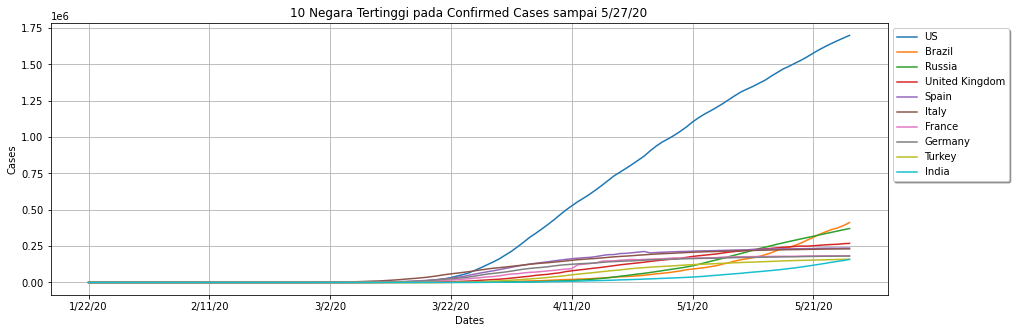

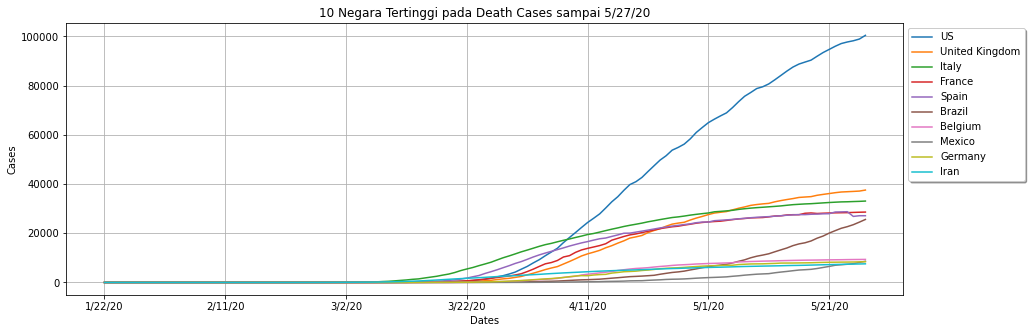

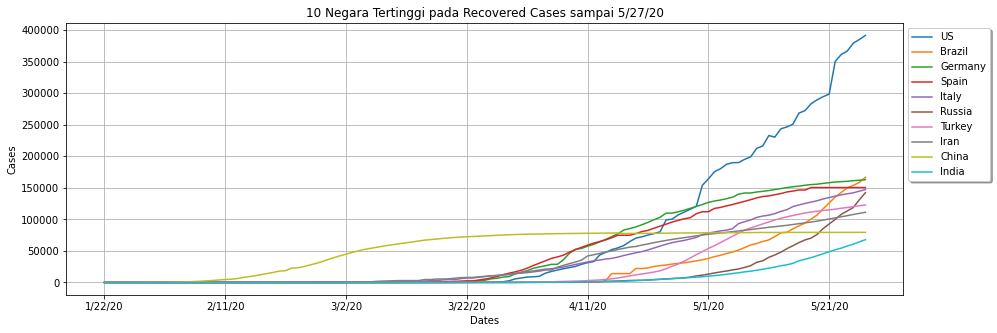

In [28]:
for i, j in zip(df, judul_df):
    plotCaseTertinggi(i, j, yesterday, 10)

## Worldwide Active Cases 

In [29]:
# define 1st column of df_active
all_country = df_confirmed.iloc[:, 0].values.tolist()
df_active = pd.DataFrame(data={'Country/Region': all_country})    
# df_active = df_confirmed - df_recovered - df_death
for j in all_dates:
    df_active[j] = np.asarray((df_confirmed.loc[:, j] - df_recovered.loc[:, j] - df_death.loc[:, j]).tolist()).flatten()
# redefine df_active to set index 
df_active = df_active.set_index("Country/Region", drop = False)

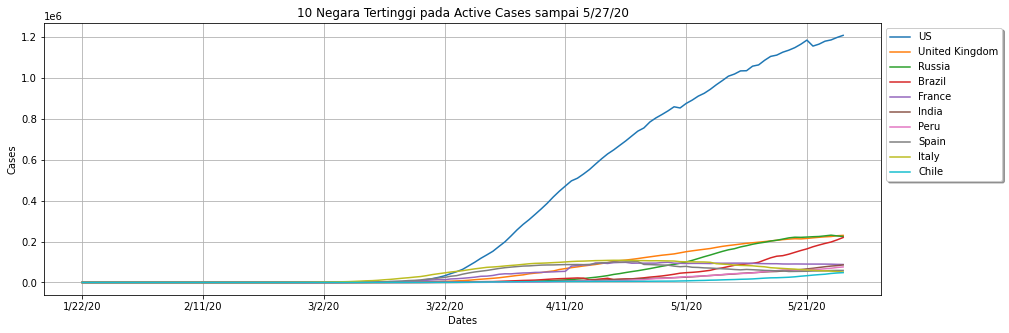

In [30]:
plotCaseTertinggi(df_active, 'Active Cases', yesterday, 10)

## Worldwide Daily New Cases

In [31]:
# df_new (axis=columns) = df_confirmed[i+1] - df_confirmed[i]
df_new = df_confirmed.iloc[:,1:].diff(periods=1, axis=1)
# adding all_country as the first column
df_new.insert(loc=0, column='Country/Region', value=all_country)

In [32]:
df_new

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,408.0,581.0,492.0,531.0,540.0,782.0,584.0,591.0,658.0,625.0
Albania,Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,15.0,5.0,12.0,8.0,9.0,6.0,25.0,21.0
Algeria,Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,182.0,176.0,165.0,186.0,190.0,195.0,193.0,197.0,194.0,160.0
Andorra,Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Angola,Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,6.0,2.0,1.0,8.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,West Bank and Gaza,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,7.0,25.0,0.0,0.0,0.0,0.0,6.0,5.0
Western Sahara,Western Sahara,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
Yemen,Yemen,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,37.0,17.0,13.0,12.0,3.0,10.0,11.0,16.0,7.0


Dari *df_new* di atas, bisa dilihat pada `1/22/20` mempunyai **_missing values_** dikarenakan merupakan tanggal pertama (tidak mempunyai selisih pada tanggal sebelumnya). Oleh karena itu, kolom `1/22/20` pada *df_new* akan kita **_drop_**. 

In [33]:
# redefine the datas (drop the unnecessary columns for next analysis: 1/22/20)
df_new = df_new.drop(df_new.columns[[1]], inplace=False, axis=1)

## Worldwide Daily Cases (Confirmed, Recovered, & Death)

In [34]:
# daily recovered 
df_daily_recovered = df_recovered.iloc[:,1:].diff(periods=1, axis=1)
df_daily_recovered.insert(loc=0, column='Country/Region', value=all_country)
df_daily_recovered = df_daily_recovered.drop(df_daily_recovered.columns[[1]], inplace=False, axis=1)
# daily death 
df_daily_death = df_death.iloc[:,1:].diff(periods=1, axis=1)
df_daily_death.insert(loc=0, column='Country/Region', value=all_country)
df_daily_death = df_daily_death.drop(df_daily_death.columns[[1]], inplace=False, axis=1)
df_daily = [df_new, df_daily_recovered, df_daily_death]
df_daily_judul = ['Daily Confirmed Cases', 'Daily Recovered Cases', 'Daily Death Cases']

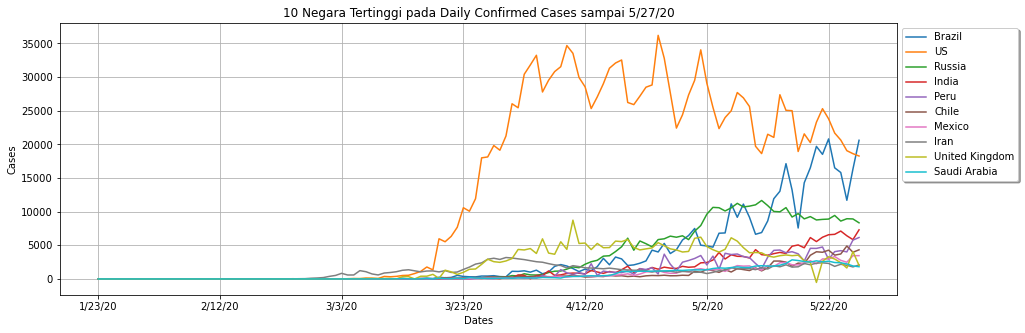

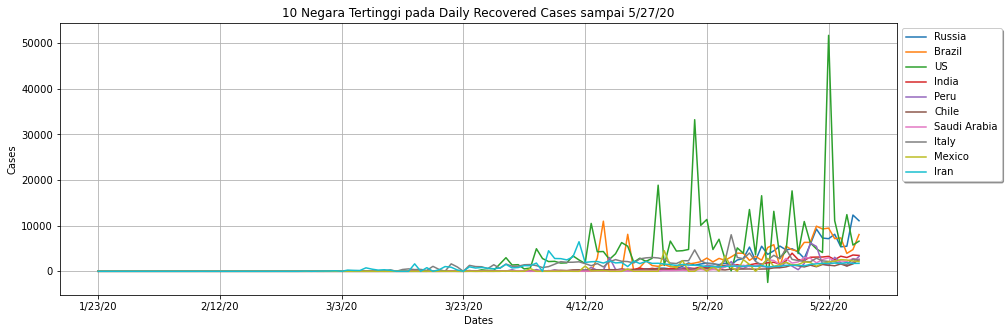

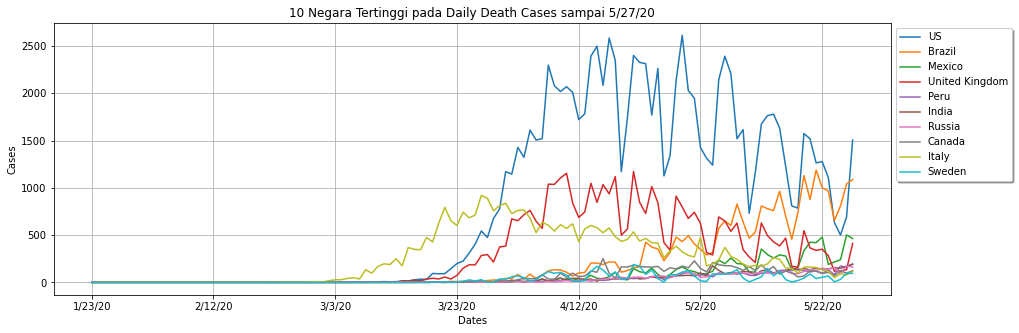

In [35]:
for i, j in zip(df_daily, df_daily_judul):
    plotCaseTertinggi(i, j, yesterday, 10)

# Data Visualization: Indonesia

## Cumulative Cases 

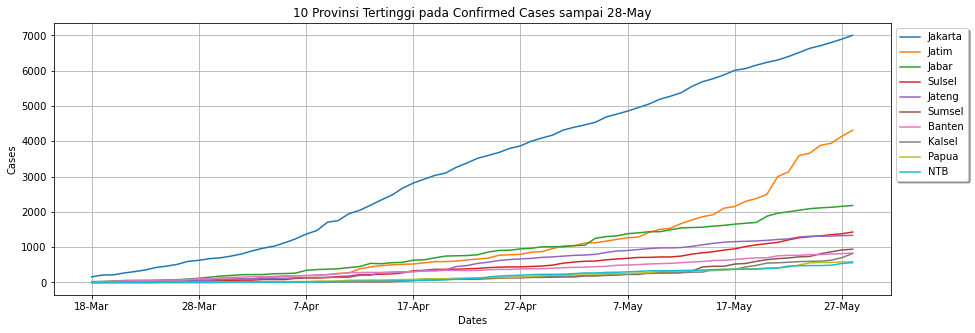

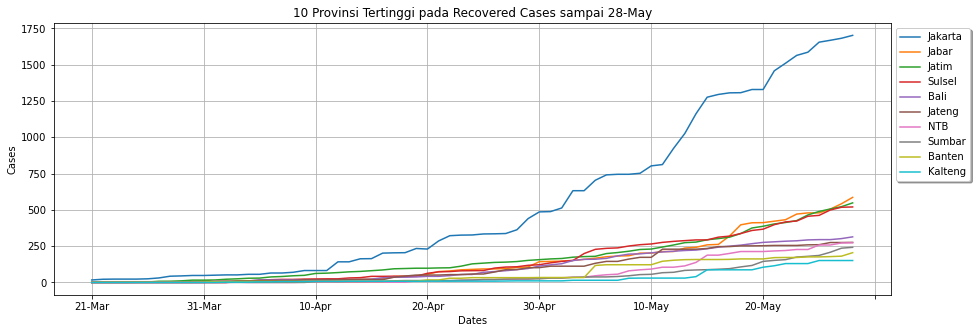

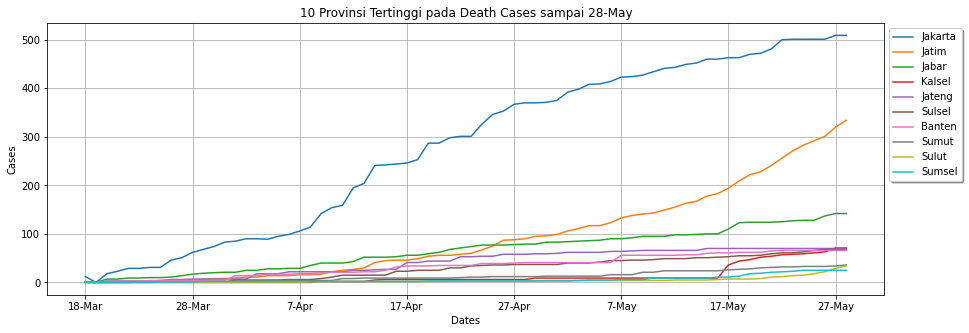

In [36]:
for i,j in zip(kumpulan_df_indo_timeline[0:3], judul_df_indo_timeline[0:3]):
    plotCaseTertinggiIndonesia(i, j, yesterday_indonesia, 10)

## Daily Cases 

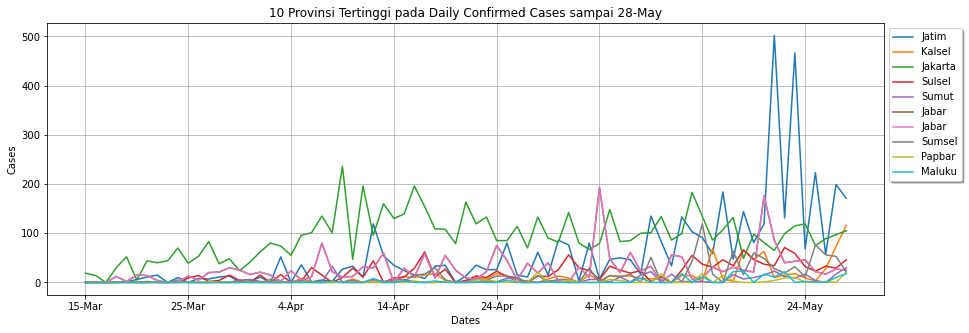

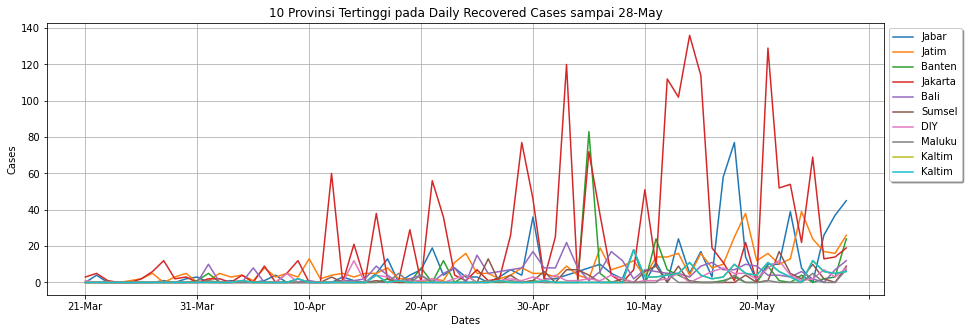

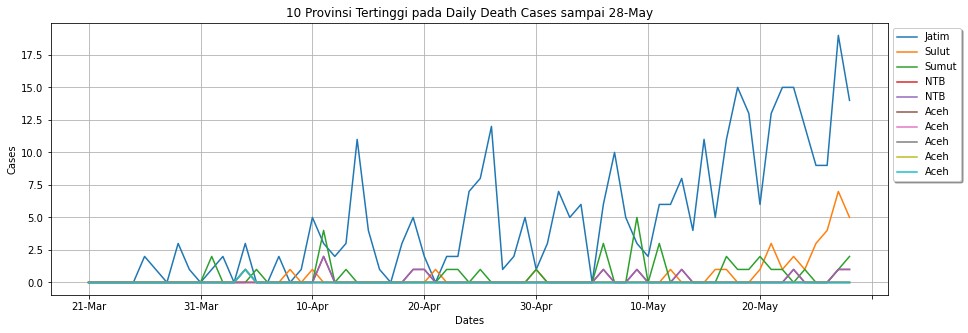

In [37]:
for i,j in zip(kumpulan_df_indo_timeline[3:6], judul_df_indo_timeline[3:6]):
    plotCaseTertinggiIndonesia(i, j, yesterday_indonesia, 10)

# Data Analysis: International

Untuk tahap analisa data, kita menggunakan data *df_new* yang merupakan data **_daily new cases_** dan *df_mean* yang merupakan **_10-day moving average_**. Dikarenakan, kita ingin mengetahui laju pertumbuhan per-hari dari kasus yang terlapor (*confirmed case*).

In [38]:
# 10-day moving average
df_mean = df_new.loc[:, '1/23/20':].rolling(window=10, min_periods=0, axis=1).mean()

Selanjutnya, kita **membagi** negara berdasarkan seberapa baik negara tersebut menekan laju pertumbuhan dari kasus Covid19 (**_flatten the curve_**).

In [39]:
# batas-batas untuk klasifikasi
upper_bound = 0.5 # 50 % dari max_avg
lower_bound = 0.25 # 25 % dari max_avg
bad = [] # latest_avg di atas upper_bound
bad_val = []
bad_max_val = []
bad_latest_val = []
mid = [] # latest_avg di antara upper_bound & lower_bound
mid_val = []
mid_max_val = []
mid_latest_val = []
good= [] # latest_avg di bawah lower bound
good_val = []
good_max_val = []
good_latest_val = []
for i in all_country:
    max_value = max((df_new.loc[i, :].tolist())[1:])
    latest_value = (df_new.loc[i, :].tolist())[-1]
    max_avg = max((df_mean.loc[i, :].tolist())[1:])
    latest_avg = (df_mean.loc[i, :].tolist())[-1]
    max_index = df_new.loc[i].tolist().index(max_value)
    latest_index = len(all_dates)-1
    # slope (rate of change)
    if latest_index==max_index:
        slope = 0
    else:
        slope = (latest_value-max_value)/(latest_index-max_index)
    if (latest_avg >= (upper_bound * max_avg)):
        bad.append(i)
        bad_val.append(slope)
        bad_max_val.append(max_value)
        bad_latest_val.append(latest_value)
    elif ((latest_avg < (upper_bound * max_avg)) and (latest_avg >= (lower_bound * max_avg))):
        mid.append(i)
        mid_val.append(slope)
        mid_max_val.append(max_value)
        mid_latest_val.append(latest_value)
    elif (latest_avg < (lower_bound * max_avg)):
        good.append(i)
        good_val.append(slope)
        good_max_val.append(max_value)
        good_latest_val.append(latest_value)
# define dataframe
df_bad = pd.DataFrame({'Country': bad, 'Maximum Cases': bad_max_val, 'Latest Cases': bad_latest_val, 'Rate of Change': bad_val})
df_mid = pd.DataFrame({'Country': mid, 'Maximum Cases': mid_max_val, 'Latest Cases': mid_latest_val, 'Rate of Change': mid_val})
df_good = pd.DataFrame({'Country': good, 'Maximum Cases': good_max_val, 'Latest Cases': good_latest_val, 'Rate of Change': good_val})
# sorting each dataframe 
df_bad = df_bad.sort_values(['Maximum Cases', 'Rate of Change'], ascending=[False, True], ignore_index=True)
df_mid = df_mid.sort_values(['Maximum Cases', 'Rate of Change'], ascending=[False, True], ignore_index=True)
df_good = df_good.sort_values(['Maximum Cases', 'Rate of Change'], ascending=[False, True], ignore_index=True)

## Kelompok 1 

Kelompok ini beranggotakan negara-negara yang **harus mengambil tindakan**, karena penurunan kasus harian belum signifikan (kasus terakhir masih di atas 50% dari kasus puncak).

Last updated: 5/27/20


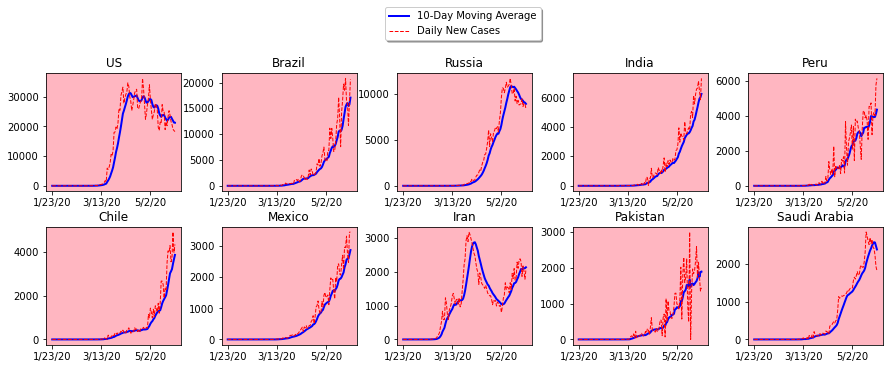

In [40]:
fig = plt.figure(figsize=[15,5])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(df_bad['Country'][:10].tolist(), [*range(1,11)]):
    ax = plt.subplot(2,5,j)
    df_mean.loc[i, '1/23/20':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_new.loc[i, '1/23/20':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(-1.5, 2.9), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday)
plt.show()

## Kelompok 2 

Kelompok ini beranggotakan negara-negara yang **sedang berjuang** untuk menurunkan kasus, karena penurunan kasus harian mulai terlihat (kasus terakhir di bawah 50%, namun masih di atas 25% dari kasus puncak).

Last updated: 5/27/20


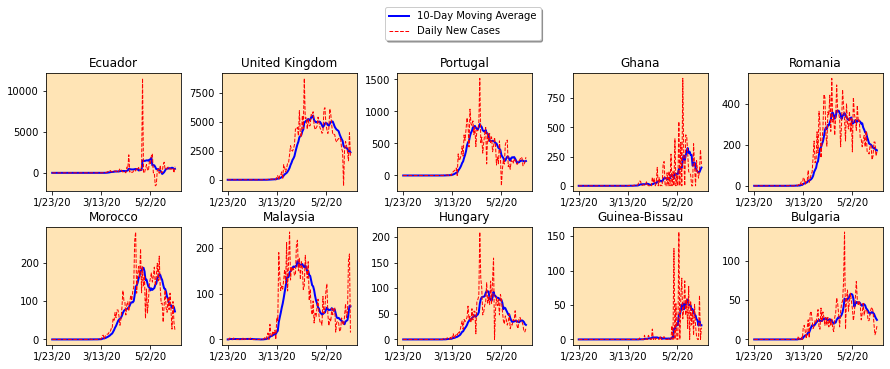

In [41]:
fig = plt.figure(figsize=[15,5])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(df_mid['Country'][:10].tolist(), [*range(1,11)]):
    ax = plt.subplot(2,5,j)
    df_mean.loc[i, '1/23/20':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_new.loc[i, '1/23/20':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    ax.set_facecolor('moccasin')
plt.legend(bbox_to_anchor=(-1.5, 2.9), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday)
plt.show()

## Kelompok 3 

Kelompok ini beranggotakan negara-negara yang **berada pada jalur yang benar** untuk menurunkan kasus, karena penurunan kasus harian sudah terlihat (kasus terakhir di bawah 25% dari kasus puncak).

Last updated: 5/27/20


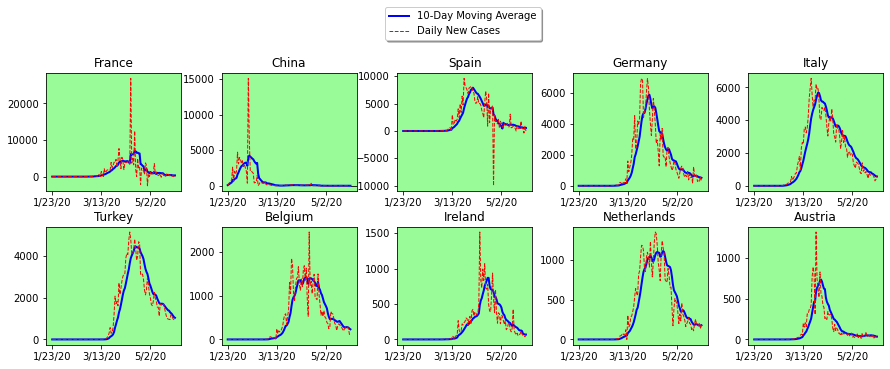

In [42]:
fig = plt.figure(figsize=[15,5])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(df_good['Country'][:10].tolist(), [*range(1,11)]):
    ax = plt.subplot(2,5,j)
    df_mean.loc[i, '1/23/20':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_new.loc[i, '1/23/20':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    ax.set_facecolor('palegreen')
plt.legend(bbox_to_anchor=(-1.5, 2.9), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday)
plt.show()

Penting untuk diketahui bahwa pembagian 3 kelompok di atas berdasarkan data terakhir. Keesokan hari, mungkin bisa terjadi perubahan data secara drastis. **_''Flattening the curve is winning one battle, not the war, and it will take constant effort to keep the virus at bay.'' - John Burn-Murdoch_** 

## Seluruh Negara 

Last updated: 5/27/20


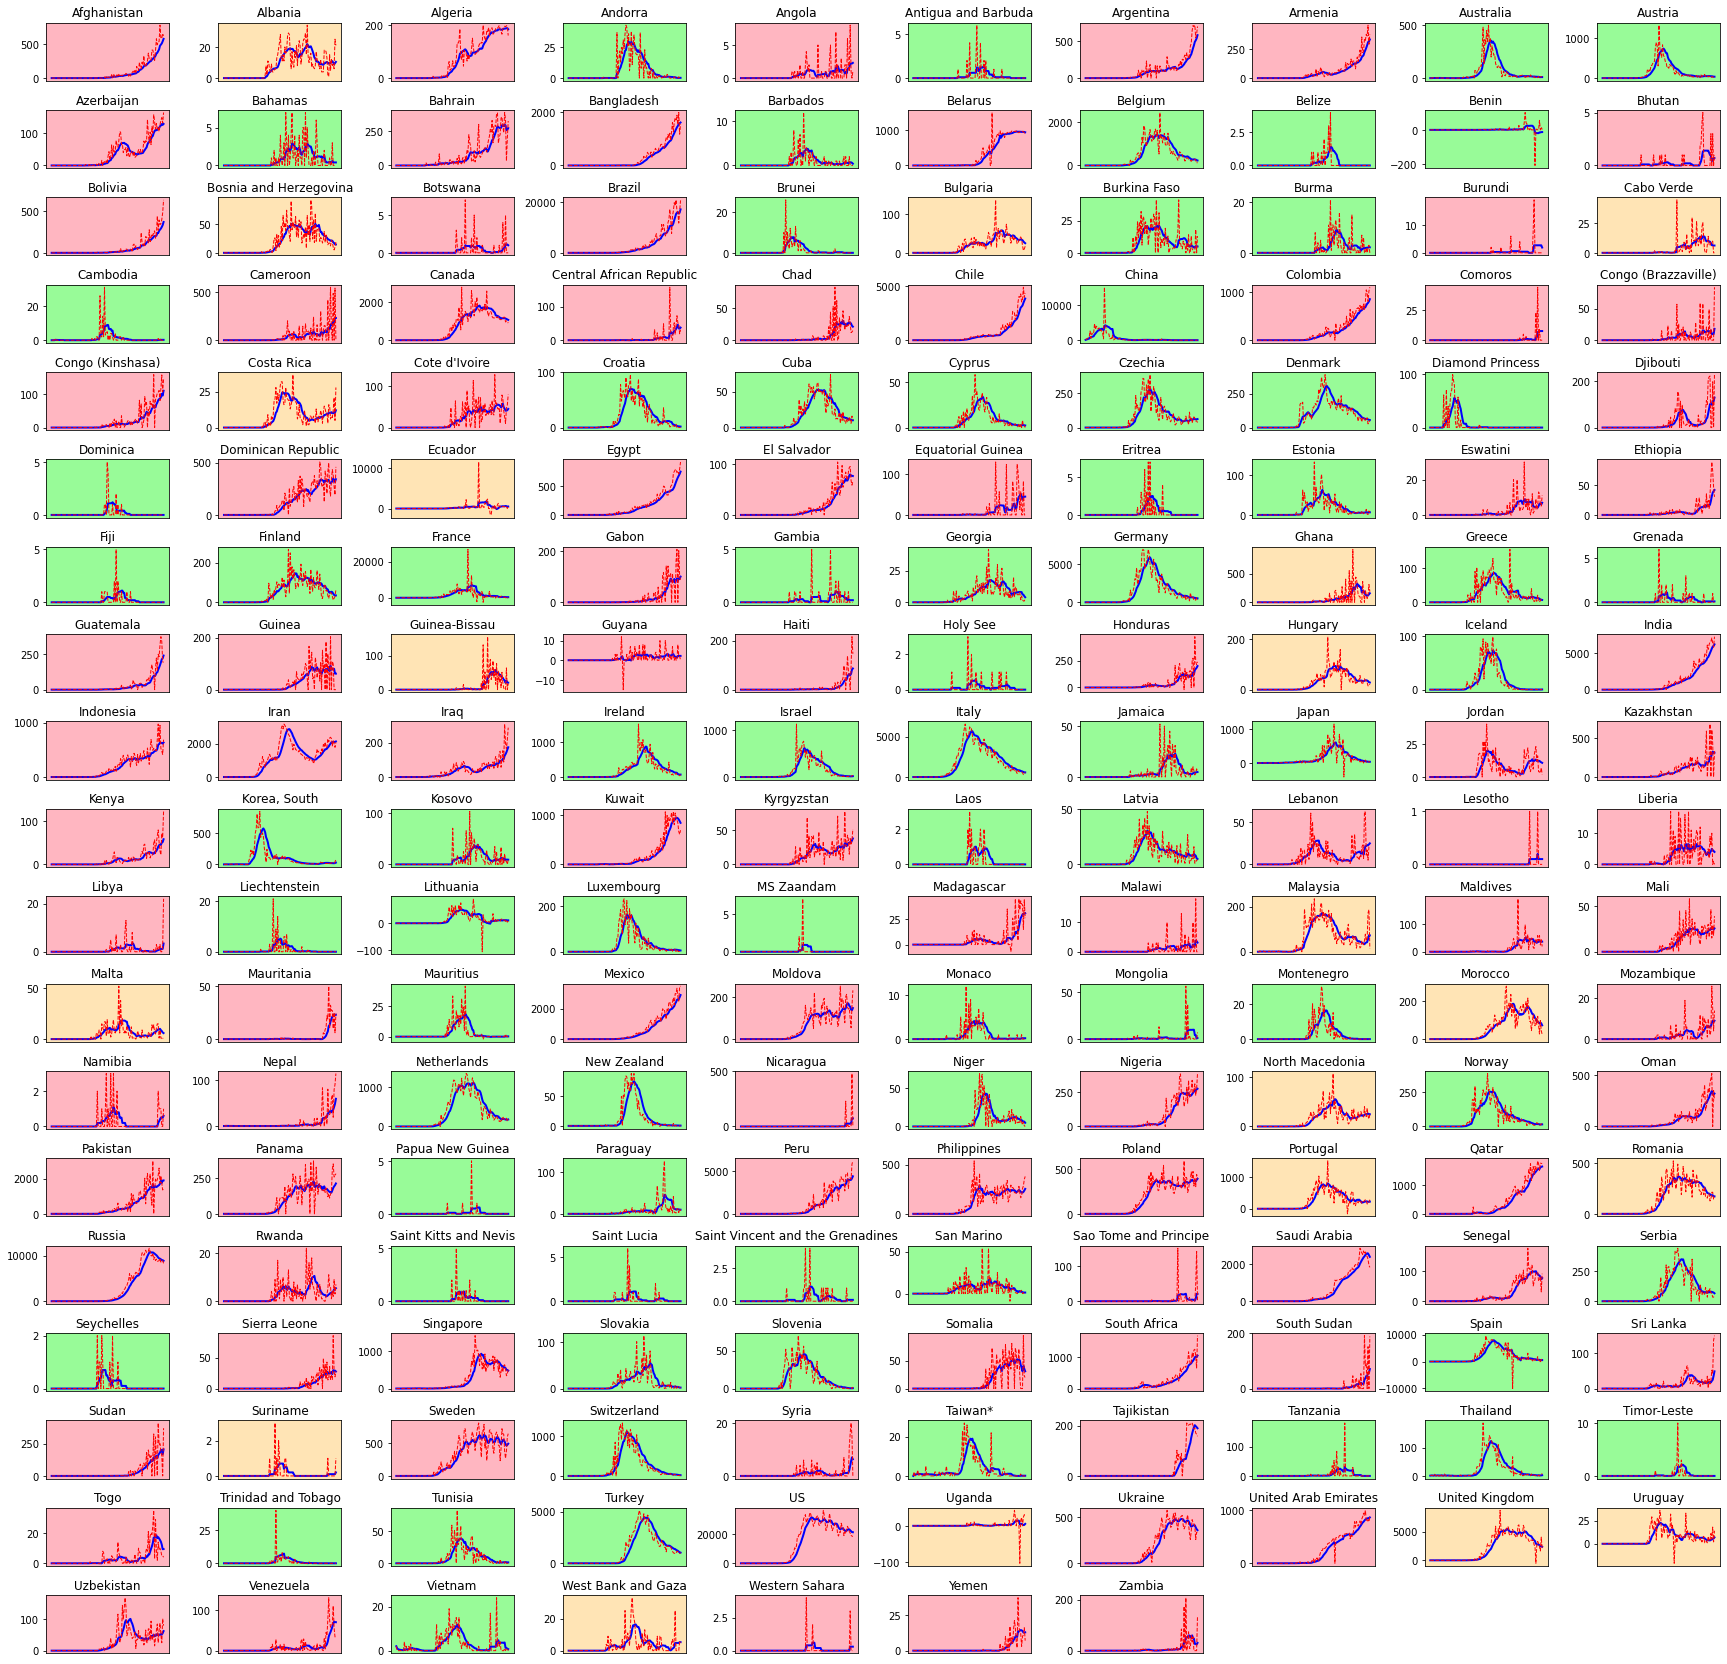

In [43]:
fig = plt.figure(figsize=[30,30])
fig.subplots_adjust(wspace=0.4, hspace=0.5)
for i,j in zip(all_country, [*range(1,188)]):
    ax = plt.subplot(19,10,j)
    df_mean.loc[i, '1/23/20':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_new.loc[i, '1/23/20':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good:
        ax.set_facecolor('palegreen')
        plt.xticks([], [])
    elif i in mid:
        ax.set_facecolor('moccasin')
        plt.xticks([], [])
    elif i in bad:
        ax.set_facecolor('lightpink')
        plt.xticks([], [])
print("Last updated: %s" % yesterday)
plt.show()

In [44]:
# percent change
df_recovered_pct_change = df_recovered.iloc[:,1:].pct_change(axis=1)
df_recovered_pct_change = df_recovered_pct_change.replace([np.inf, -np.inf], np.nan)
df_recovered_pct_change = df_recovered_pct_change.fillna(0)
df_death_pct_change = df_death.iloc[:,1:].pct_change(axis=1)
df_death_pct_change = df_death_pct_change.replace([np.inf, -np.inf], np.nan)
df_death_pct_change = df_death_pct_change.fillna(0)
df_confirmed_pct_change = df_confirmed.iloc[:,1:].pct_change(axis=1)
df_confirmed_pct_change = df_confirmed_pct_change.replace([np.inf, -np.inf], np.nan)
df_confirmed_pct_change = df_confirmed_pct_change.fillna(0)
# avg pct change
df_confirmed_pct_change_avg = statistics.mean(df_confirmed_pct_change.loc['Indonesia',:].tolist())*100
df_death_pct_change_avg = statistics.mean(df_death_pct_change.loc['Indonesia',:].tolist())*100
df_recovered_pct_change_avg = statistics.mean(df_recovered_pct_change.loc['Indonesia',:].tolist())*100

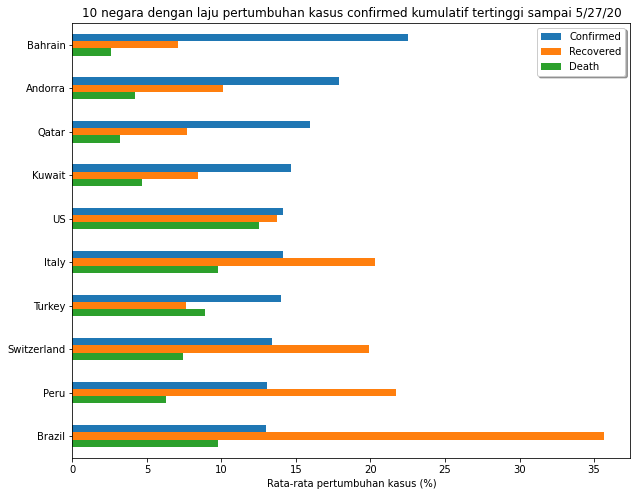

In [45]:
# components
list_avg_pct_change_confirmed_international = []
list_avg_pct_change_recovered_international = []
list_avg_pct_change_death_international = []
# fill the components
for i in all_country:
    list_avg_pct_change_confirmed_international.append(statistics.mean(df_confirmed_pct_change.loc[i,:].tolist())*100)
    list_avg_pct_change_recovered_international.append(statistics.mean(df_recovered_pct_change.loc[i,:].tolist())*100)
    list_avg_pct_change_death_international.append(statistics.mean(df_death_pct_change.loc[i,:].tolist())*100)
# dataframe
df_avg_pct_change_international = pd.DataFrame({'Confirmed': list_avg_pct_change_confirmed_international,
                                        'Recovered': list_avg_pct_change_recovered_international, 
                                        'Death': list_avg_pct_change_death_international}, index=all_country)
# sort dataframe by confirmed rate
df_avg_pct_change_international = df_avg_pct_change_international.sort_values(by=['Confirmed'], ascending=False)
# invert
df_avg_pct_change_international.iloc[:10,:].plot.barh(figsize=(10,8), width=0.5).invert_yaxis()
# plot
plt.title('10 negara dengan laju pertumbuhan kasus confirmed kumulatif tertinggi sampai %s' % yesterday)
plt.xlabel('Rata-rata pertumbuhan kasus (%)')
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.show()

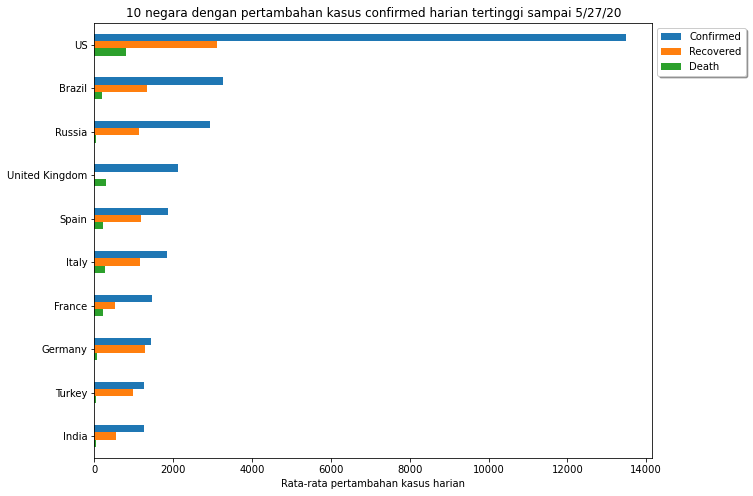

In [46]:
# components
list_penambahan_confirmed_international = []
list_penambahan_recovered_international = []
list_penambahan_death_international = []
# fill the components
for i in all_country:
    list_penambahan_confirmed_international.append(statistics.mean(df_new.loc[i,'1/23/20':].tolist()))
    list_penambahan_recovered_international.append(statistics.mean(df_daily_recovered.loc[i,'1/23/20':].tolist()))
    list_penambahan_death_international.append(statistics.mean(df_daily_death.loc[i,'1/23/20':].tolist()))
# dataframe
df_penambahan_kasus_international = pd.DataFrame({'Confirmed': list_penambahan_confirmed_international,
                                        'Recovered': list_penambahan_recovered_international, 
                                        'Death': list_penambahan_death_international}, index=all_country)
# sort dataframe by confirmed rate
df_penambahan_kasus_international = df_penambahan_kasus_international.sort_values(by=['Confirmed'], ascending=False)
# invert
df_penambahan_kasus_international.iloc[:10,:].plot.barh(figsize=(10,8), width=0.5).invert_yaxis()
# plot
plt.title('10 negara dengan pertambahan kasus confirmed harian tertinggi sampai %s' % yesterday)
plt.xlabel('Rata-rata pertambahan kasus harian')
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.show()

# COVID-19 in ASEAN 

Last updated: 5/27/20


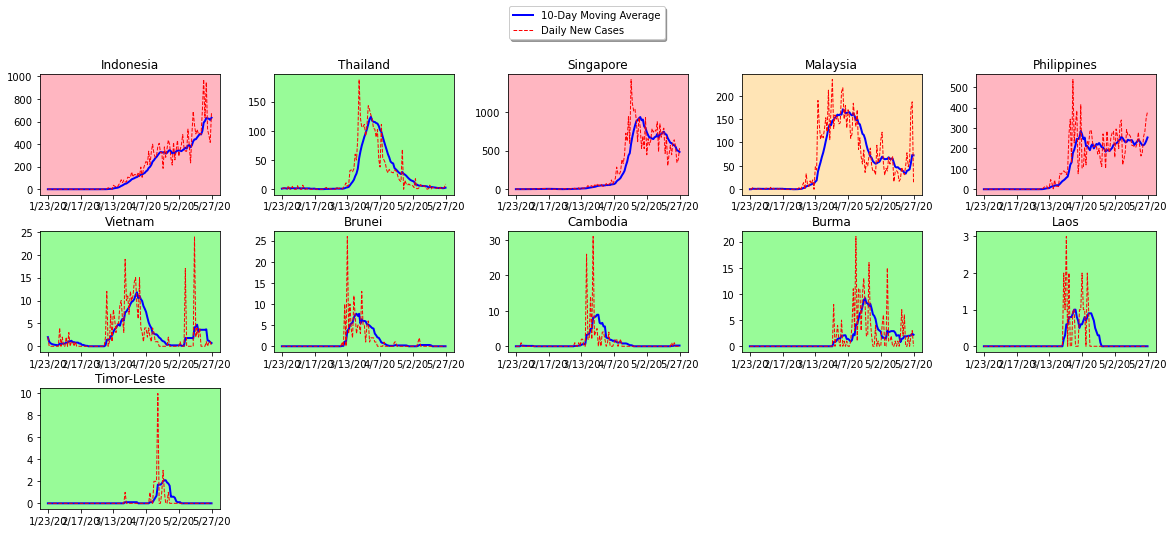

In [47]:
asean = ['Thailand', 'Singapore', 'Malaysia', 'Philippines', 'Vietnam', 'Brunei', 'Cambodia', 'Burma', 'Laos', 'Timor-Leste']
asean_plus_indonesia = ['Indonesia'] + asean   
fig = plt.figure(figsize=[20, 8])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(asean_plus_indonesia, [*range(1,12)]):
    ax = plt.subplot(3,5,j)
    df_mean.loc[i, '1/23/20':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_new.loc[i, '1/23/20':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good:
        ax.set_facecolor('palegreen')
    elif i in mid:
        ax.set_facecolor('moccasin')
    elif i in bad:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(3.5, 4.2), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday)
plt.show()

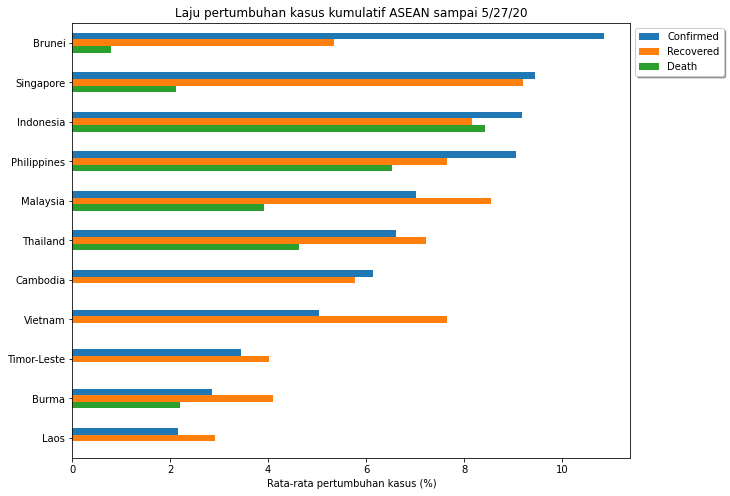

In [48]:
# components
list_avg_pct_change_confirmed_asean = []
list_avg_pct_change_recovered_asean = []
list_avg_pct_change_death_asean = []
# fill the components
for i in asean_plus_indonesia:
    list_avg_pct_change_confirmed_asean.append(statistics.mean(df_confirmed_pct_change.loc[i,:].tolist())*100)
    list_avg_pct_change_recovered_asean.append(statistics.mean(df_recovered_pct_change.loc[i,:].tolist())*100)
    list_avg_pct_change_death_asean.append(statistics.mean(df_death_pct_change.loc[i,:].tolist())*100)
# dataframe
df_avg_pct_change_asean = pd.DataFrame({'Confirmed': list_avg_pct_change_confirmed_asean,
                                        'Recovered': list_avg_pct_change_recovered_asean, 
                                        'Death': list_avg_pct_change_death_asean}, index=asean_plus_indonesia)
# sort dataframe by confirmed rate
df_avg_pct_change_asean = df_avg_pct_change_asean.sort_values(by=['Confirmed'], ascending=False)
# invert
df_avg_pct_change_asean.plot.barh(figsize=(10,8), width=0.5).invert_yaxis()
# plot
plt.title('Laju pertumbuhan kasus kumulatif ASEAN sampai %s' % yesterday)
plt.xlabel('Rata-rata pertumbuhan kasus (%)')
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.show()

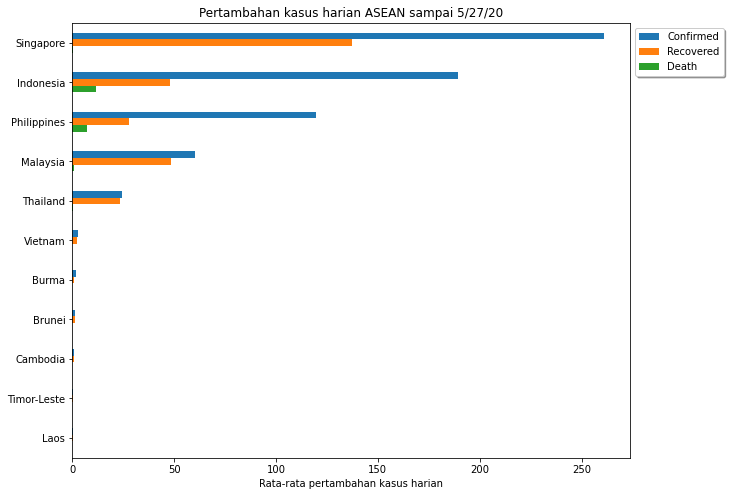

In [49]:
# components
list_penambahan_confirmed_asean = []
list_penambahan_recovered_asean = []
list_penambahan_death_asean = []
# fill the components
for i in asean_plus_indonesia:
    list_penambahan_confirmed_asean.append(statistics.mean(df_new.loc[i,'1/23/20':].tolist()))
    list_penambahan_recovered_asean.append(statistics.mean(df_daily_recovered.loc[i,'1/23/20':].tolist()))
    list_penambahan_death_asean.append(statistics.mean(df_daily_death.loc[i,'1/23/20':].tolist()))
# dataframe
df_penambahan_kasus_asean = pd.DataFrame({'Confirmed': list_penambahan_confirmed_asean,
                                        'Recovered': list_penambahan_recovered_asean, 
                                        'Death': list_penambahan_death_asean}, index=asean_plus_indonesia)
# sort dataframe by confirmed rate
df_penambahan_kasus_asean = df_penambahan_kasus_asean.sort_values(by=['Confirmed'], ascending=False)
# invert
df_penambahan_kasus_asean.plot.barh(figsize=(10,8), width=0.5).invert_yaxis()
# plot
plt.title('Pertambahan kasus harian ASEAN sampai %s' % yesterday)
plt.xlabel('Rata-rata pertambahan kasus harian')
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.show()

# COVID-19 in Indonesia 

Pertama, kita ingin mengetahui **Indonesia masuk ke kelompok berapa**.

In [50]:
indonesia_max_val = max((df_new.loc['Indonesia', :].tolist())[1:])
indonesia_latest_val = (df_new.loc['Indonesia', :].tolist())[-1]
if 'Indonesia' in bad:
    print('Pada %s, Indonesia bagian dari %s dengan kasus puncak %s dan kasus terakhir %s' 
          % (yesterday, 'Kelompok 1', indonesia_max_val, indonesia_latest_val))
elif 'Indonesia' in mid:
    print('Pada %s, Indonesia bagian dari %s dengan kasus puncak %s dan kasus terakhir %s' 
          % (yesterday, 'Kelompok 2', indonesia_max_val, indonesia_latest_val))
elif 'Indonesia' in good:
    print('Pada %s, Indonesia bagian dari %s dengan kasus puncak %s dan kasus terakhir %s' 
          % (yesterday, 'Kelompok 3', indonesia_max_val, indonesia_latest_val))

Pada 5/27/20, Indonesia bagian dari Kelompok 1 dengan kasus puncak 973.0 dan kasus terakhir 686.0


Selanjutnya, kita ingin mengetahui **tingkat pertumbuhan kasus COVID-19 di Indonesia**.

Last updated: 5/27/20


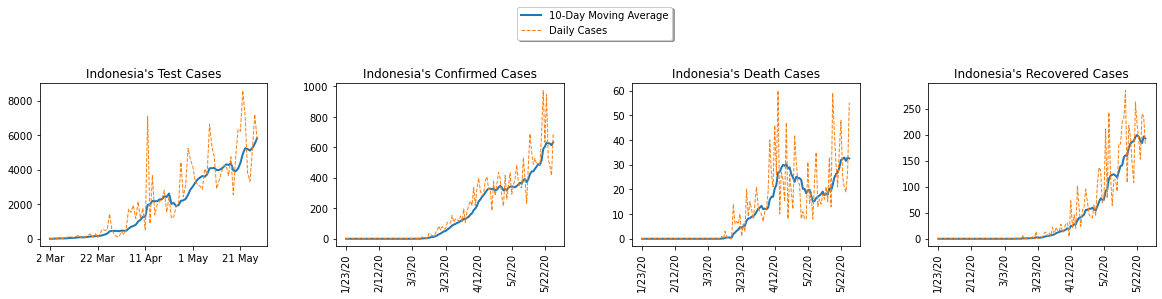

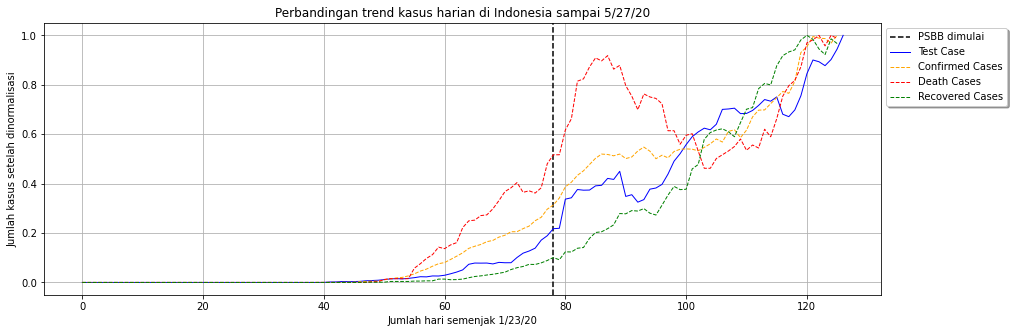

Laju pertumbuhan kasus kumulatif di Indonesia:
+------------+-----------------+-------------+-----------------+
| Test Cases | Confirmed Cases | Death Cases | Recovered Cases |
+------------+-----------------+-------------+-----------------+
|  20.09 %   |     9.17 %      |   8.42 %    |     8.16 %      |
+------------+-----------------+-------------+-----------------+


In [51]:
# daily test
df_test_harian = df_indo_statistik_harian.loc['Orang yang dites', :]
df_test_harian = df_test_harian.astype(int)
df_test = df_test_harian.cumsum()
# delta days between test case and others
d0 = date(2020, 1, 23)
d1 = date(2020, 3, 2)
delta_test = d1 - d0
# percent change test
df_test_pct_change = df_test.pct_change(axis=0)
df_test_pct_change = df_test_pct_change.replace([np.inf, -np.inf], np.nan)
df_test_pct_change = df_test_pct_change.fillna(0)
# 10-day moving average
df_mean_recovered = df_daily_recovered.loc[:, '1/23/20':].rolling(window=10, min_periods=0, axis=1).mean()
df_mean_death = df_daily_death.loc[:, '1/23/20':].rolling(window=10, min_periods=0, axis=1).mean()
df_mean_test = df_test_harian.rolling(window=10, min_periods=0, axis=0).mean()
# avg pct_change test
df_test_pct_change_avg = statistics.mean([0]*delta_test.days+df_test_pct_change.tolist())*100
# pct_change_avg dataframe
df_slope_indonesia = pd.DataFrame([(str(round(df_test_pct_change_avg , 2))+' %', 
                          str(round(df_confirmed_pct_change_avg, 2))+' %',
                          str(round(df_death_pct_change_avg, 2))+' %', 
                                    str(round(df_recovered_pct_change_avg, 2))+' %')], 
                                  columns=['Test Cases', 'Confirmed Cases', 'Death Cases', 'Recovered Cases'])

# plot subplot
fig = plt.figure(figsize=[20, 3])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax = plt.subplot(1,4,1)
df_mean_test.plot(label='10-Day Moving Average', linewidth=2)
df_test_harian.plot(linestyle='dashed', label='Daily Cases', linewidth=1)
plt.title('Indonesia\'s Test Cases')
ax = plt.subplot(1,4,2)
df_mean.loc['Indonesia', '1/23/20':].plot(label='10-Day Moving Average', linewidth=2)
df_new.loc['Indonesia', '1/23/20':].plot(linestyle='dashed', label='Daily Cases', linewidth=1)
plt.title('Indonesia\'s Confirmed Cases')
plt.xticks(rotation=90)
ax = plt.subplot(1,4,3)
df_mean_death.loc['Indonesia', '1/23/20':].plot(label='10-Day Moving Average', linewidth=2)
df_daily_death.loc['Indonesia', '1/23/20':].plot(linestyle='dashed', label='Daily Cases', linewidth=1)
plt.title('Indonesia\'s Death Cases')
plt.xticks(rotation=90)
ax = plt.subplot(1,4,4)
df_mean_recovered.loc['Indonesia', '1/23/20':].plot(label='10-Day Moving Average', linewidth=2)
df_daily_recovered.loc['Indonesia', '1/23/20':].plot(linestyle='dashed', label='Daily Cases', linewidth=1)
plt.title('Indonesia\'s Recovered Cases')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(-1.1, 1.5), fancybox=True, shadow=True)
print('Last updated: %s' % yesterday)
plt.show()
# normalized
plt.figure(figsize=[15,5])
normalized_test = preprocessing.minmax_scale([0]*delta_test.days+df_mean_test.tolist())
normalized_confirmed = preprocessing.minmax_scale(df_mean.loc['Indonesia', '1/23/20':].tolist())
normalized_death = preprocessing.minmax_scale(df_mean_death.loc['Indonesia', '1/23/20':].tolist())
normalized_recovered = preprocessing.minmax_scale(df_mean_recovered.loc['Indonesia', '1/23/20':].tolist())
# psbb
d0_psbb_indo = date(2020, 1, 23)
d1_psbb_indo = date(2020, 4, 10)
delta_psbb_indo = d1_psbb_indo - d0_psbb_indo
plt.axvline(x=delta_psbb_indo.days, linestyle='dashed', label='PSBB dimulai', color='black')
# plot
plt.plot(normalized_test, label='Test Case', color='blue', linewidth=1)
plt.plot(normalized_confirmed, label='Confirmed Cases', color='orange', linestyle='dashed', linewidth=1)
plt.plot(normalized_death, label='Death Cases', color='red', linestyle='dashed', linewidth=1)
plt.plot(normalized_recovered, label='Recovered Cases', color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Jumlah hari semenjak 1/23/20')
plt.ylabel('Jumlah kasus setelah dinormalisasi')
plt.title('Perbandingan trend kasus harian di Indonesia sampai %s' % yesterday)
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.grid()
plt.show()
# output
print('Laju pertumbuhan kasus kumulatif di Indonesia:')
#print(df_slope_indonesia.to_string(index=False))
print(tabulate(df_slope_indonesia, headers='keys', showindex=False, tablefmt="pretty"))

Berikut adalah **negara dari kelompok 3 yang mempunyai kasus puncak mirip dengan Indonesia**.

In [52]:
closest_max_value = min(df_good['Maximum Cases'].tolist(), key=lambda x:abs(x-indonesia_max_val))
index_closest_max = df_good.index[df_good['Maximum Cases'] == closest_max_value].tolist()
country_closest_max = df_good['Country'].tolist()[index_closest_max[0]]
print('Negara dari Kelompok 3 yang mempunyai Kasus Puncak mirip dengan Indonesia adalah:\n%s dengan kasus puncak: %s.'
      % (country_closest_max, closest_max_value))

Negara dari Kelompok 3 yang mempunyai Kasus Puncak mirip dengan Indonesia adalah:
Korea, South dengan kasus puncak: 851.0.


Berikut adalah **negara tetangga dari Indonesia (negara ASEAN) yang merupakan anggota kelompok 3**.

In [53]:
asean_good = []
asean_max_val = []
for i in asean:
    if i in good:
        asean_good.append(i)
        asean_max_val.append(max((df_new.loc[i, :].tolist())[1:]))
df_asean = pd.DataFrame({'Country': asean_good, 'Maximum Cases': asean_max_val})
closest_asean_max_value = min(df_asean['Maximum Cases'].tolist(), key=lambda x:abs(x-indonesia_max_val))
index_asean_closest_max = df_asean.index[df_asean['Maximum Cases'] == closest_asean_max_value].tolist()
country_asean_closest_max = df_asean['Country'].tolist()[index_asean_closest_max[0]]
print('Negara ASEAN dari Kelompok 3 yang mempunyai Kasus Puncak mirip dengan Indonesia adalah:\n%s dengan kasus puncak: %s.'
      % (country_asean_closest_max, closest_asean_max_value))

Negara ASEAN dari Kelompok 3 yang mempunyai Kasus Puncak mirip dengan Indonesia adalah:
Thailand dengan kasus puncak: 188.0.


Jika kita lihat grafik dari kedua negara tersebut, seharusnya **_recovered rate_** lebih tinggi daripada **_death rate_**.

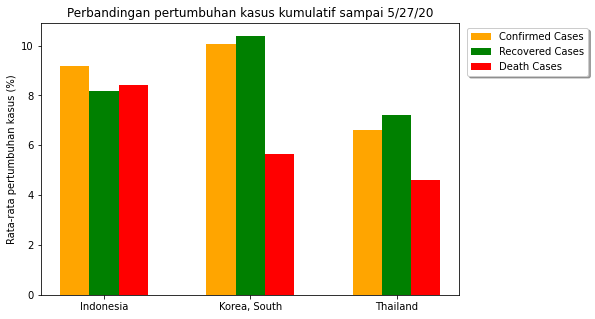

In [54]:
comparison = [country_closest_max, country_asean_closest_max]
data = [[statistics.mean(df_confirmed_pct_change.loc['Indonesia',:].tolist())*100, 
                   statistics.mean(df_confirmed_pct_change.loc[comparison[0],:].tolist())*100,
                   statistics.mean(df_confirmed_pct_change.loc[comparison[1],:].tolist())*100], 
        [statistics.mean(df_recovered_pct_change.loc['Indonesia',:].tolist())*100, 
                   statistics.mean(df_recovered_pct_change.loc[comparison[0],:].tolist())*100,
                   statistics.mean(df_recovered_pct_change.loc[comparison[1],:].tolist())*100], 
        [statistics.mean(df_death_pct_change.loc['Indonesia',:].tolist())*100, 
                   statistics.mean(df_death_pct_change.loc[comparison[0],:].tolist())*100,
                   statistics.mean(df_death_pct_change.loc[comparison[1],:].tolist())*100]
       ]
X = np.arange(3)
plt.figure(figsize=[7.5,5])
plt.bar(X + 0.0, data[0], color = 'orange', width = 0.2, label='Confirmed Cases')
plt.bar(X + 0.2, data[1], color = 'g', width = 0.2, label='Recovered Cases')
plt.bar(X + 0.4, data[2], color = 'r', width = 0.2, label='Death Cases')
plt.title('Perbandingan pertumbuhan kasus kumulatif sampai %s' % yesterday)
plt.ylabel('Rata-rata pertumbuhan kasus (%)')
plt.xticks(X + 0.2, ['Indonesia', comparison[0], comparison[1]])
plt.legend(bbox_to_anchor=(1.32, 1), fancybox=True, shadow=True)
plt.show()

Last updated: 5/27/20


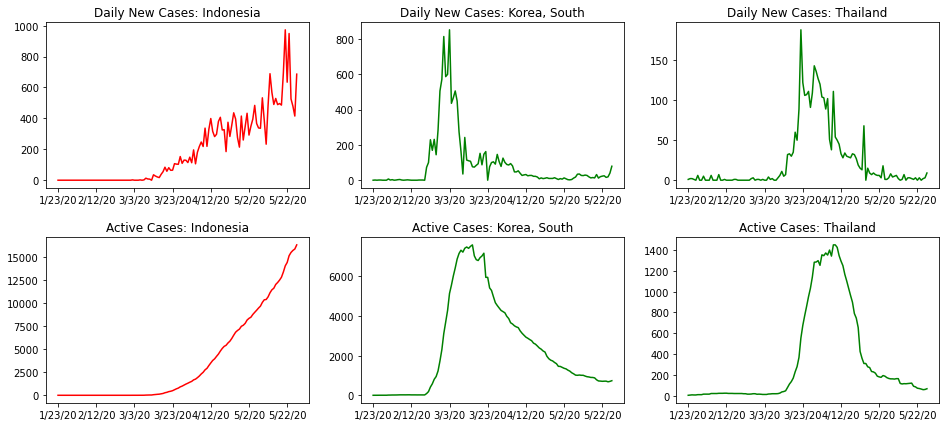

In [55]:
""" Plot """
plt.figure(figsize=[16,7])
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplot(2,3,1)
df_new.loc['Indonesia', '1/23/20':].plot(color='red')
plt.title('Daily New Cases: Indonesia')
plt.subplot(2,3,2)
df_new.loc[comparison[0], '1/23/20':].plot(color='green')
plt.title('Daily New Cases: %s' % comparison[0])
plt.subplot(2,3,3)
df_new.loc[comparison[1], '1/23/20':].plot(color='green')
plt.title('Daily New Cases: %s' % comparison[1])
plt.subplot(2,3,4)
df_active.loc['Indonesia', '1/23/20':].plot(color='red')
plt.title('Active Cases: Indonesia')
plt.subplot(2,3,5)
df_active.loc[comparison[0], '1/23/20':].plot(color='green')
plt.title('Active Cases: %s' % comparison[0])
plt.subplot(2,3,6)
df_active.loc[comparison[1], '1/23/20':].plot(color='green')
plt.title('Active Cases: %s' % comparison[1])
print("Last updated: %s" % yesterday)
plt.show()

Dengan kemiripan puncak kasus harian (**_daily new cases_**) dan sosiografis (negara ASEAN), Indonesia bisa mengikuti pendekatan yang diambil oleh 2 negara tersebut dalam menekan laju pertumbuhan kasus COVID-19.

# Data Analysis: Indonesia

In [56]:
all_province = df_indo_daily_confirmed.index.tolist()
all_dates_daily_confirmed = list(df_indo_daily_confirmed)[0:]

In [57]:
# 10-day moving average
df_mean_indonesia = df_indo_daily_confirmed.loc[:, :].rolling(window=10, min_periods=0, axis=1).mean()

In [58]:
# batas-batas untuk klasifikasi
bad_indonesia = [] # latest_avg di atas upper_bound
bad_val_indonesia = []
bad_max_val_indonesia = []
bad_latest_val_indonesia = []
mid_indonesia = [] # latest_avg di antara upper_bound & lower_bound
mid_val_indonesia = []
mid_max_val_indonesia = []
mid_latest_val_indonesia = []
good_indonesia = [] # latest_avg di bawah lower bound
good_val_indonesia = []
good_max_val_indonesia = []
good_latest_val_indonesia = []
for i in all_province:
    max_value_indonesia = max((df_indo_daily_confirmed.loc[i, :].tolist())[1:])
    latest_value_indonesia = (df_indo_daily_confirmed.loc[i, :].tolist())[-1]
    max_avg_indonesia = max((df_mean_indonesia.loc[i, :].tolist())[1:])
    latest_avg_indonesia = (df_mean_indonesia.loc[i, :].tolist())[-1]
    max_index_indonesia = df_indo_daily_confirmed.loc[i].tolist().index(max_value_indonesia)
    latest_index_indonesia = len(all_dates_daily_confirmed)-1
    # slope (rate of change)
    if latest_index_indonesia==max_index_indonesia:
        slope_indonesia = 0
    else:
        slope_indonesia = (latest_value_indonesia-max_value_indonesia)/(latest_index_indonesia-max_index_indonesia)
    if (latest_avg_indonesia >= (upper_bound * max_avg_indonesia)):
        bad_indonesia.append(i)
        bad_val_indonesia.append(slope_indonesia)
        bad_max_val_indonesia.append(max_value_indonesia)
        bad_latest_val_indonesia.append(latest_value_indonesia)
    elif ((latest_avg_indonesia < (upper_bound * max_avg_indonesia)) and (latest_avg_indonesia >= (lower_bound * max_avg_indonesia))):
        mid_indonesia.append(i)
        mid_val_indonesia.append(slope_indonesia)
        mid_max_val_indonesia.append(max_value_indonesia)
        mid_latest_val_indonesia.append(latest_value_indonesia)
    elif (latest_avg_indonesia < (lower_bound * max_avg_indonesia)):
        good_indonesia.append(i)
        good_val_indonesia.append(slope_indonesia)
        good_max_val_indonesia.append(max_value_indonesia)
        good_latest_val_indonesia.append(latest_value_indonesia)
# define dataframe
df_bad_indonesia = pd.DataFrame({'Country': bad_indonesia, 'Maximum Cases': bad_max_val_indonesia, 'Latest Cases': bad_latest_val_indonesia, 'Rate of Change': bad_val_indonesia})
df_mid_indonesia = pd.DataFrame({'Country': mid_indonesia, 'Maximum Cases': mid_max_val_indonesia, 'Latest Cases': mid_latest_val_indonesia, 'Rate of Change': mid_val_indonesia})
df_good_indonesia = pd.DataFrame({'Country': good_indonesia, 'Maximum Cases': good_max_val_indonesia, 'Latest Cases': good_latest_val_indonesia, 'Rate of Change': good_val_indonesia})
# sorting each dataframe 
df_bad_indonesia = df_bad_indonesia.sort_values(['Maximum Cases', 'Rate of Change'], ascending=[False, True], ignore_index=True)
df_mid_indonesia = df_mid_indonesia.sort_values(['Maximum Cases', 'Rate of Change'], ascending=[False, True], ignore_index=True)
df_good_indonesia = df_good_indonesia.sort_values(['Maximum Cases', 'Rate of Change'], ascending=[False, True], ignore_index=True)

In [59]:
sumatera = ['Aceh', 'Sumut', 'Sumbar', 'Riau', 'Kep Riau', 'Jambi', 'Bengkulu', 'Sumsel', 'Babel', 'Lampung']
kalimantan = ['Kaltara', 'Kalbar', 'Kalteng', 'Kalsel', 'Kaltim']
jawa = ['Banten', 'Jabar', 'Jakarta', 'Jateng', 'DIY', 'Jatim']
sulawesi = ['Gorontalo', 'Sulut', 'Sulbar', 'Sulteng', 'Sulsel', 'Sultra']
bali_ntt = ['Bali', 'NTB', 'NTT']
maluku_papua = ['Maluku', 'Papua']

## Sumatera 

Last updated: 28-May


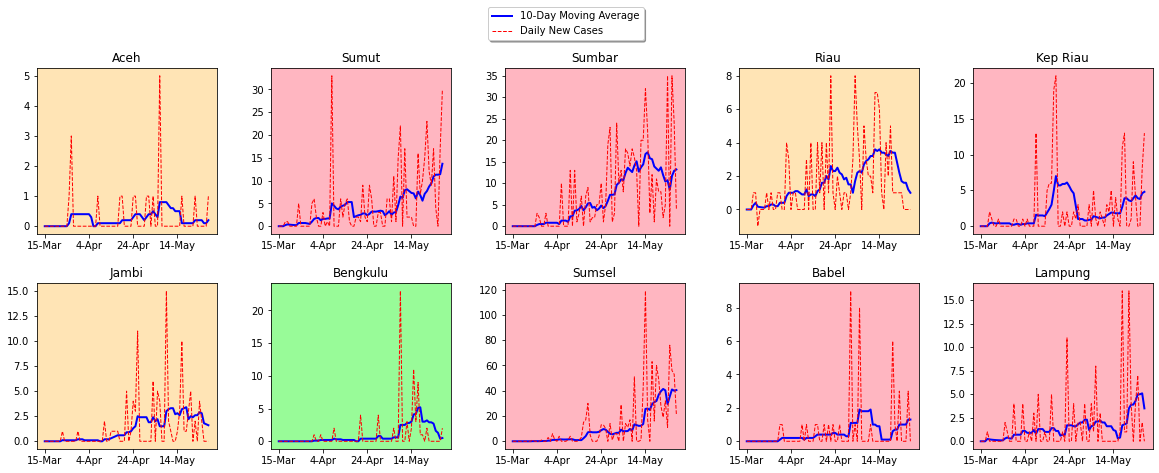

In [60]:
fig = plt.figure(figsize=[20, 7])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(sumatera, [*range(1,11)]):
    ax = plt.subplot(2,5,j)
    df_mean_indonesia.loc[i, '15-Mar':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_indo_daily_confirmed.loc[i, '15-Mar':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good_indonesia:
        ax.set_facecolor('palegreen')
    elif i in mid_indonesia:
        ax.set_facecolor('moccasin')
    elif i in bad_indonesia:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(-1.8, 2.7), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday_indonesia)
plt.show()

## Kalimantan 

Last updated: 28-May


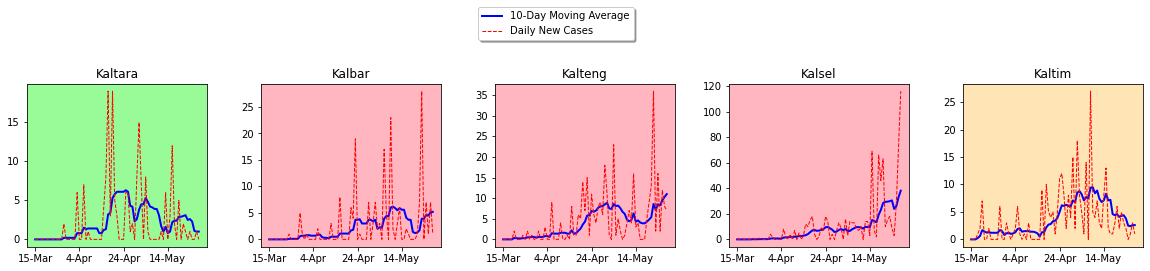

In [61]:
fig = plt.figure(figsize=[20, 3])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(kalimantan, [*range(1,6)]):
    ax = plt.subplot(1,5,j)
    df_mean_indonesia.loc[i, '15-Mar':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_indo_daily_confirmed.loc[i, '15-Mar':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good_indonesia:
        ax.set_facecolor('palegreen')
    elif i in mid_indonesia:
        ax.set_facecolor('moccasin')
    elif i in bad_indonesia:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(-1.8, 1.5), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday_indonesia)
plt.show()

## Jawa 

Last updated: 28-May


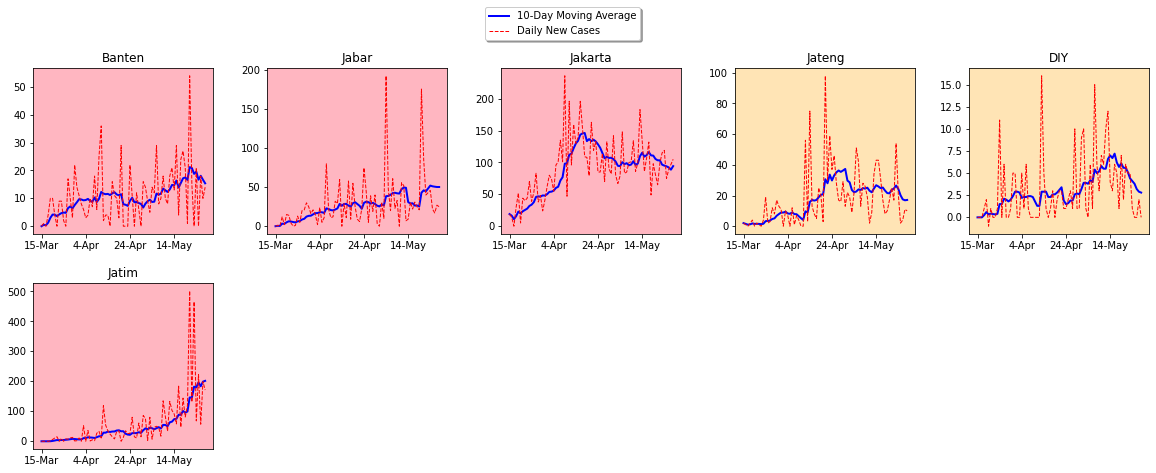

In [62]:
fig = plt.figure(figsize=[20, 7])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(jawa, [*range(1,7)]):
    ax = plt.subplot(2,5,j)
    df_mean_indonesia.loc[i, '15-Mar':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_indo_daily_confirmed.loc[i, '15-Mar':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good_indonesia:
        ax.set_facecolor('palegreen')
    elif i in mid_indonesia:
        ax.set_facecolor('moccasin')
    elif i in bad_indonesia:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(3.4, 2.7), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday_indonesia)
plt.show()

## Sulawesi 

Last updated: 28-May


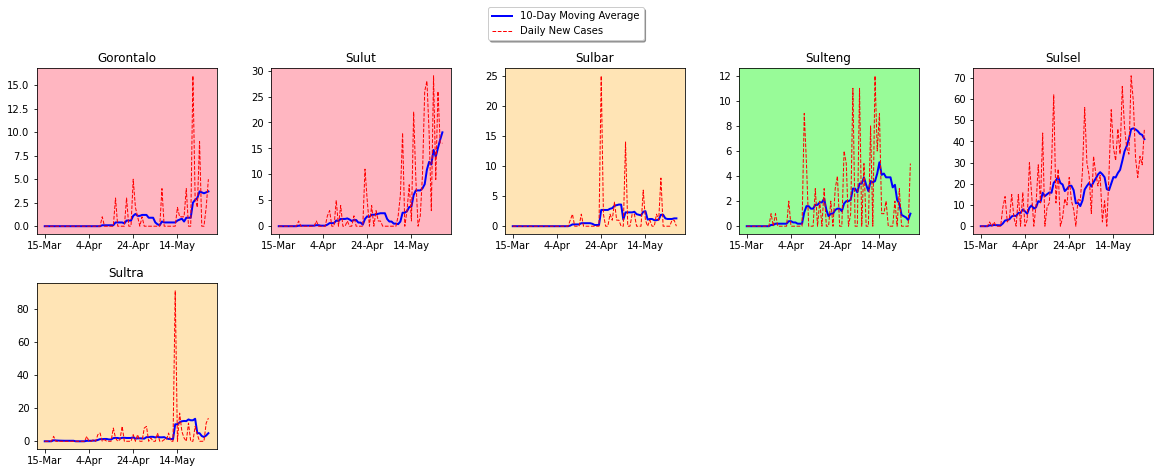

In [63]:
fig = plt.figure(figsize=[20, 7])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(sulawesi, [*range(1,7)]):
    ax = plt.subplot(2,5,j)
    df_mean_indonesia.loc[i, '15-Mar':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_indo_daily_confirmed.loc[i, '15-Mar':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good_indonesia:
        ax.set_facecolor('palegreen')
    elif i in mid_indonesia:
        ax.set_facecolor('moccasin')
    elif i in bad_indonesia:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(3.4, 2.7), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday_indonesia)
plt.show()

# Bali & NTT

Last updated: 28-May


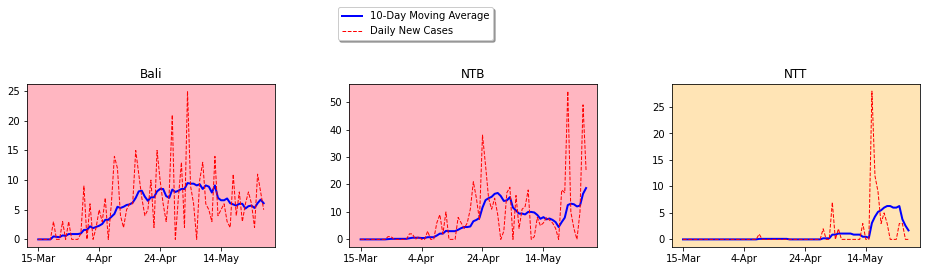

In [64]:
fig = plt.figure(figsize=[16, 3])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(bali_ntt, [*range(1,4)]):
    ax = plt.subplot(1,3,j)
    df_mean_indonesia.loc[i, '15-Mar':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_indo_daily_confirmed.loc[i, '15-Mar':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good_indonesia:
        ax.set_facecolor('palegreen')
    elif i in mid_indonesia:
        ax.set_facecolor('moccasin')
    elif i in bad_indonesia:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(-0.7, 1.5), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday_indonesia)
plt.show()

## Maluku & Papua 

Last updated: 28-May


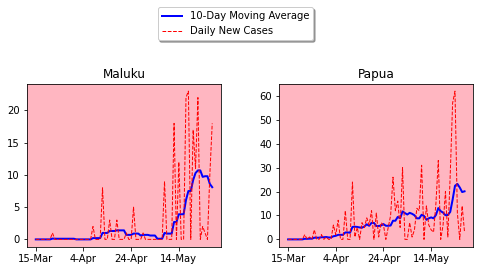

In [65]:
fig = plt.figure(figsize=[8, 3])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(maluku_papua, [*range(1,3)]):
    ax = plt.subplot(1,2,j)
    df_mean_indonesia.loc[i, '15-Mar':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_indo_daily_confirmed.loc[i, '15-Mar':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good_indonesia:
        ax.set_facecolor('palegreen')
    elif i in mid_indonesia:
        ax.set_facecolor('moccasin')
    elif i in bad_indonesia:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(0.2, 1.5), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday_indonesia)
plt.show()

## Seluruh Provinsi 

In [66]:
all_province_islands = sumatera + kalimantan + jawa + sulawesi + bali_ntt + maluku_papua

Last updated: 28-May


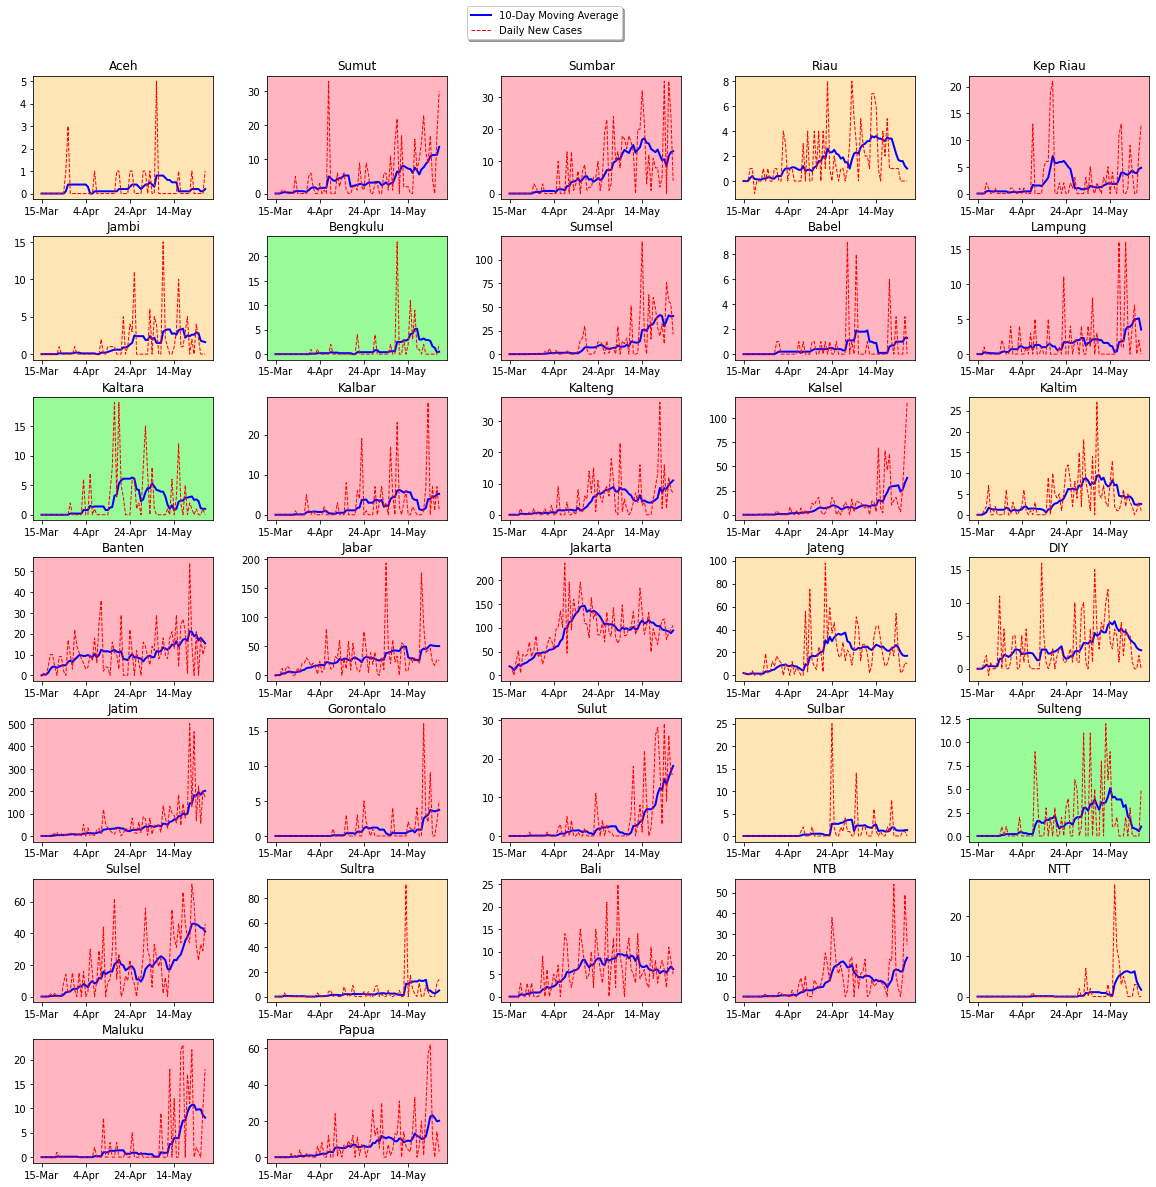

In [67]:
fig = plt.figure(figsize=[20, 20])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i,j in zip(all_province_islands, [*range(1,33)]):
    ax = plt.subplot(7,5,j)
    df_mean_indonesia.loc[i, '15-Mar':].plot(color='blue', label='10-Day Moving Average', linewidth=2)
    df_indo_daily_confirmed.loc[i, '15-Mar':].plot(color='red', linestyle='dashed', label='Daily New Cases', linewidth=1)
    plt.title(i)
    if i in good_indonesia:
        ax.set_facecolor('palegreen')
    elif i in mid_indonesia:
        ax.set_facecolor('moccasin')
    elif i in bad_indonesia:
        ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(2, 9.4), fancybox=True, shadow=True)
print("Last updated: %s" % yesterday_indonesia)
plt.show()

In [68]:
# percent change
df_indo_confirmed_pct_change = df_indo_confirmed.pct_change(axis=1)
df_indo_confirmed_pct_change = df_indo_confirmed_pct_change.replace([np.inf, -np.inf], np.nan)
df_indo_confirmed_pct_change = df_indo_confirmed_pct_change.fillna(0)
df_indo_death_pct_change = df_indo_death.pct_change(axis=1)
df_indo_death_pct_change = df_indo_death_pct_change.replace([np.inf, -np.inf], np.nan)
df_indo_death_pct_change = df_indo_death_pct_change.fillna(0)
df_indo_recovered_pct_change = df_indo_recovered.pct_change(axis=1)
df_indo_recovered_pct_change = df_indo_recovered_pct_change.replace([np.inf, -np.inf], np.nan)
df_indo_recovered_pct_change = df_indo_recovered_pct_change.fillna(0)

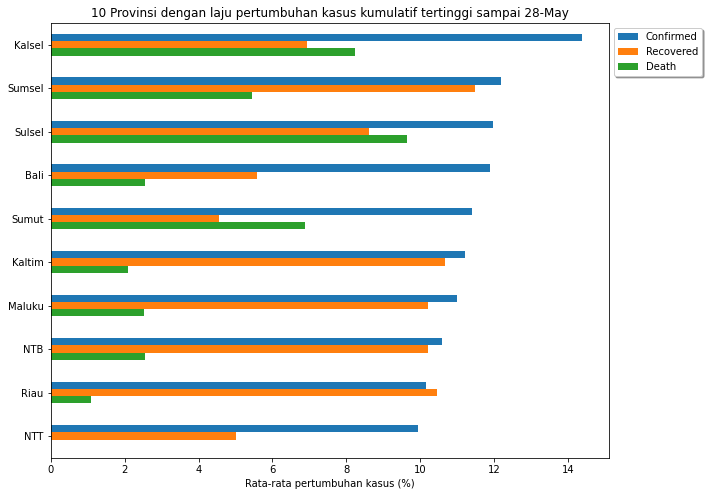

In [69]:
# components
list_avg_pct_change_confirmed_provinsi = []
list_avg_pct_change_recovered_provinsi = []
list_avg_pct_change_death_provinsi = []
# fill the components
for i in all_province:
    list_avg_pct_change_confirmed_provinsi.append(statistics.mean(df_indo_confirmed_pct_change.loc[i,:].tolist())*100)
    list_avg_pct_change_recovered_provinsi.append(statistics.mean(df_indo_recovered_pct_change.loc[i,:].tolist())*100)
    list_avg_pct_change_death_provinsi.append(statistics.mean(df_indo_death_pct_change.loc[i,:].tolist())*100)
# dataframe
df_avg_pct_change_provinsi = pd.DataFrame({'Confirmed': list_avg_pct_change_confirmed_provinsi,
                                        'Recovered': list_avg_pct_change_recovered_provinsi, 
                                        'Death': list_avg_pct_change_death_provinsi}, index=all_province)
# sort dataframe by confirmed rate
df_avg_pct_change_provinsi = df_avg_pct_change_provinsi.sort_values(by=['Confirmed'], ascending=False)

# invert
df_avg_pct_change_provinsi.iloc[:10,:].plot.barh(figsize=(10,8), width=0.5).invert_yaxis()
# plot
plt.title('10 Provinsi dengan laju pertumbuhan kasus kumulatif tertinggi sampai %s' % yesterday_indonesia)
plt.xlabel('Rata-rata pertumbuhan kasus (%)')
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.show()

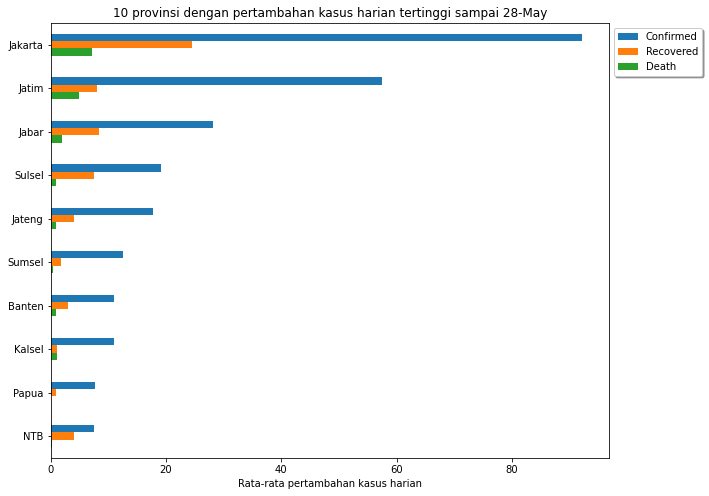

In [70]:
# components
list_penambahan_confirmed_provinsi = []
list_penambahan_recovered_provinsi = []
list_penambahan_death_provinsi = []
# fill the components
for i in all_province:
    list_penambahan_confirmed_provinsi.append(statistics.mean(df_indo_daily_confirmed.loc[i,:].tolist()))
    list_penambahan_recovered_provinsi.append(statistics.mean(df_indo_daily_recovered.loc[i,:].tolist()))
    list_penambahan_death_provinsi.append(statistics.mean(df_indo_daily_death.loc[i,:].tolist()))
# dataframe
df_penambahan_kasus_provinsi = pd.DataFrame({'Confirmed': list_penambahan_confirmed_provinsi,
                                        'Recovered': list_penambahan_recovered_provinsi, 
                                        'Death': list_penambahan_death_provinsi}, index=all_province)
# sort dataframe by confirmed rate
df_penambahan_kasus_provinsi = df_penambahan_kasus_provinsi.sort_values(by=['Confirmed'], ascending=False)
# invert
df_penambahan_kasus_provinsi.iloc[:10,:].plot.barh(figsize=(10,8), width=0.5).invert_yaxis()
# plot
plt.title('10 provinsi dengan pertambahan kasus harian tertinggi sampai %s' % yesterday_indonesia)
plt.xlabel('Rata-rata pertambahan kasus harian')
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.show()

## Active Cases & Kapasitas Rumah Sakit 

In [71]:
# define 1st column of df_active
df_active_indonesia = pd.DataFrame(data={'Provinces': all_province})    
# df_active = df_confirmed - df_recovered - df_death
all_dates_recovered = list(df_indo_recovered)[0:]
for j in all_dates_recovered:
    df_active_indonesia[j] = np.asarray((df_indo_confirmed.loc[:, j] - df_indo_recovered.loc[:, j] - df_indo_death.loc[:, j]).tolist()).flatten()
# redefine df_active to set index 
df_active_indonesia = df_active_indonesia.set_index("Provinces", drop = True)

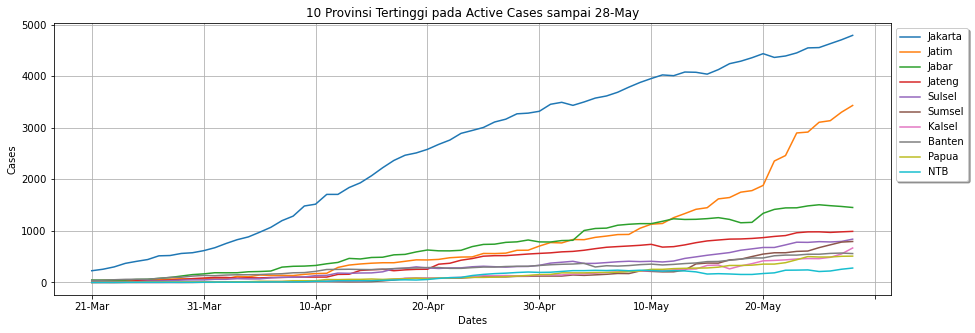

In [72]:
plotCaseTertinggiIndonesia(df_active_indonesia, 'Active Cases', yesterday_indonesia, 10)

Berdasarkan keputusan Keputusan Menteri Kesehatan No. HK.01.07/ MENKES/169/2020. Hingga saat ini, terdapat **132 RS rujukan COVID-19 dengan 47.207 tempat tidur di seluruh indonesia**. (source: https://csis.or.id/publications/menakar-keberhasilan-psbb-dalam-penanganan-covid-19-data-dan-peringatan-bagi-pemerintah-daerah)

Dengan asumsi 50% tempat tidur dikhususkan untuk pasien COVID-19.


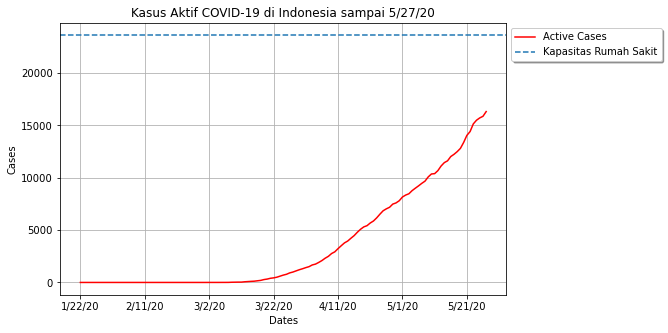

In [73]:
""" Plot """
# ukuran grafik
plt.figure(figsize=[8,5])
# plot
df_active.loc['Indonesia', '1/22/20':].plot(label='Active Cases', color='red')
plt.axhline(y=23603, linestyle='dashed', label='Kapasitas Rumah Sakit')
# plot  
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('Kasus Aktif COVID-19 di Indonesia sampai %s' % yesterday)
print('Dengan asumsi 50% tempat tidur dikhususkan untuk pasien COVID-19.')
plt.show()

## Perbandingan Pertumbuhan Kasus Sebelum & Sesudah PSBB DKI Jakarta 

Daerah paling atas (berwarna merah muda) merupakan representasi provinsi lainnya.


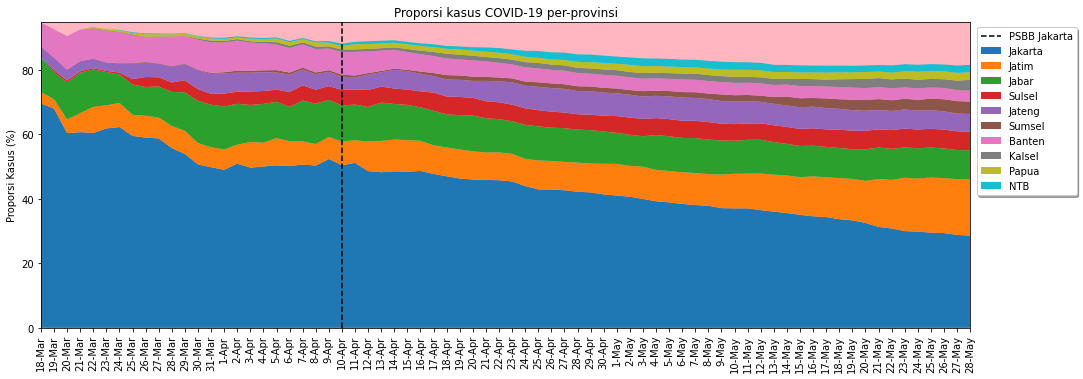

In [74]:
# Banyak data tertinggi yang ingin ditampilkan  
n_tertinggi = 10
# first date of the dataframe
first_date = (list(df_indo_confirmed)[0:])[0] 
# array n negara yang paling tinggi sampai update terakhir
r, c = df_indo_confirmed.shape
case_n = [] 
index_biggest_element = [] 
for i in np.arange(0, r):
    # semua negara dan tanggal terakhir
    case_n.append(df_indo_confirmed.loc[df_indo_confirmed.index.tolist()[i], yesterday_indonesia])
for i in np.arange(1, n_tertinggi+1):
    # index n negara tertinggi
    index_biggest_element.append(case_n.index(sorted(case_n, reverse=False)[-i]))
index_biggest_element = np.array(index_biggest_element)
# We need to transform the data from raw data to percentage (fraction)
data_perc = df_indo_confirmed.divide(df_indo_confirmed.sum(axis=0), axis=1) * 100
# plot
plt.figure(figsize=[15,5])
ax = plt.subplot()
plt.axvline(x=len(list(df_indo_confirmed.loc[:,:'10-Apr']))-1, linestyle='dashed', label='PSBB Jakarta', color='black')
plt.stackplot(list(df_indo_confirmed), 
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[0]],:], 
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[1]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[2]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[3]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[4]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[5]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[6]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[7]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[8]],:],
              data_perc.loc[df_indo_confirmed.index.tolist()[index_biggest_element[9]],:],
              labels=[df_indo_confirmed.index.tolist()[index_biggest_element[0]], 
                      df_indo_confirmed.index.tolist()[index_biggest_element[1]], 
                      df_indo_confirmed.index.tolist()[index_biggest_element[2]], 
                      df_indo_confirmed.index.tolist()[index_biggest_element[3]], 
                      df_indo_confirmed.index.tolist()[index_biggest_element[4]], 
                      df_indo_confirmed.index.tolist()[index_biggest_element[5]],
                      df_indo_confirmed.index.tolist()[index_biggest_element[6]],
                      df_indo_confirmed.index.tolist()[index_biggest_element[7]],
                      df_indo_confirmed.index.tolist()[index_biggest_element[8]],
                      df_indo_confirmed.index.tolist()[index_biggest_element[9]]
                     ])
plt.ylabel('Proporsi Kasus (%)')
plt.title('Proporsi kasus COVID-19 per-provinsi')
plt.margins(0, 0) 
ax.set_facecolor('lightpink')
plt.legend(bbox_to_anchor=(1.12, 1), fancybox=True, shadow=True)
plt.tight_layout()
ys = ['%d' % round(elem) for elem in data_perc.loc['Jakarta', :].tolist()]
xs = list(df_indo_confirmed)
plt.xticks(rotation=90)
print('Daerah paling atas (berwarna merah muda) merupakan representasi provinsi lainnya.')
plt.show()

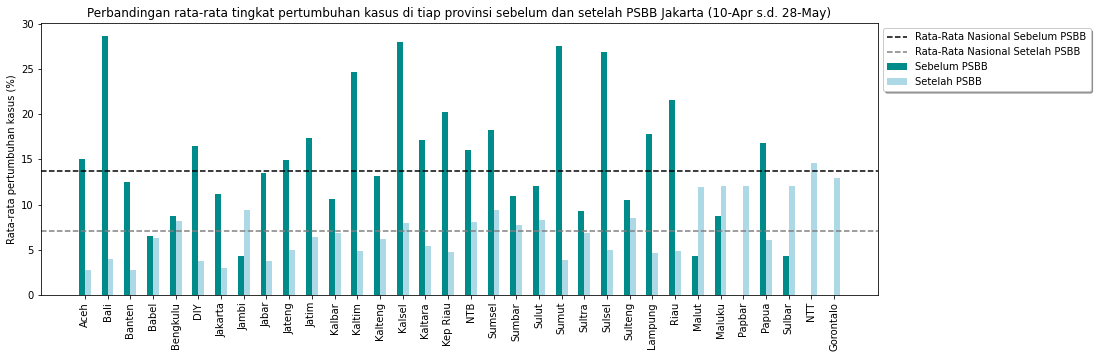

Catatan: NTT, Papua Barat, dan Gorontalo tidak dimasukkan karena data pertumbuhannya hanya tersedia setelah PSBB DKI Jakarta.


In [75]:
list_percent_before_psbb = []
list_percent_after_psbb = []
for i in all_province:
    before_psbb = df_indo_confirmed_pct_change.loc[i, :'9-Apr'].tolist()
    after_psbb = df_indo_confirmed_pct_change.loc[i, '10-Apr':].tolist()
    avg_before_psbb = statistics.mean(before_psbb)
    avg_after_psbb = statistics.mean(after_psbb)    
    list_percent_before_psbb.append(avg_before_psbb*100)
    list_percent_after_psbb.append(avg_after_psbb*100)
# ukuran grafik
plt.figure(figsize=[15,5])
# plot
N = len(all_province)
ind = np.arange(N) 
width = 0.26
plt.bar(ind, tuple(list_percent_before_psbb), width, label='Sebelum PSBB', color='darkcyan')
plt.bar(ind + width, tuple(list_percent_after_psbb), width, label='Setelah PSBB', color='lightblue')
plt.ylabel('Rata-rata pertumbuhan kasus (%)')
plt.title('Perbandingan rata-rata tingkat pertumbuhan kasus di tiap provinsi sebelum dan setelah PSBB Jakarta (10-Apr s.d. %s)' % yesterday_indonesia)
plt.xticks(ind + width / 2, tuple(all_province))
plt.xticks(rotation=90)
# plot average nasional
plt.axhline(y=(statistics.mean(list_percent_before_psbb)), linestyle='dashed', label='Rata-Rata Nasional Sebelum PSBB', color='black')
plt.axhline(y=statistics.mean(list_percent_after_psbb), linestyle='dashed', label='Rata-Rata Nasional Setelah PSBB', color='gray')
plt.legend(bbox_to_anchor=(1.26, 1), fancybox=True, shadow=True)
plt.show()
print('Catatan: NTT, Papua Barat, dan Gorontalo tidak dimasukkan karena data pertumbuhannya hanya tersedia setelah PSBB DKI Jakarta.')

In [76]:
mean_before = statistics.mean(list_percent_before_psbb)
mean_after = statistics.mean(list_percent_after_psbb)
delta_mean = abs(mean_before-mean_after)
std_normal, p_value = stats.ttest_ind(list_percent_before_psbb, list_percent_after_psbb)
df_ttest = pd.DataFrame([(str(round(mean_before, 2))+' %', 
                          str(round(mean_after, 2))+' %',
                          str(round(delta_mean, 2))+' %', round(std_normal, 3),
                          round(p_value, 5))], columns=['Mean Sebelum', 'Mean Sesudah', 'D Mean', 'Std. Error', 'P-value'])
print('Paired t-test:')
#print(df_ttest.to_string(index=False))
print(tabulate(df_ttest, headers='keys', showindex=False, tablefmt="pretty"))

Paired t-test:
+--------------+--------------+--------+------------+---------+
| Mean Sebelum | Mean Sesudah | D Mean | Std. Error | P-value |
+--------------+--------------+--------+------------+---------+
|   13.76 %    |    7.07 %    | 6.7 %  |   4.548    |  2e-05  |
+--------------+--------------+--------+------------+---------+
